In [ ]:
!pip install torchfile


  Preparing metadata (setup.py) ... done
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5693 sha256=dca55a50f6313ab89ea12565cb218690490554d7808dfb3195ca37fab5b3fe5d
  Stored in directory: /root/.cache/pip/wheels/2d/0d/6c/cc20d113923479bc37343fc2268b9b369a1b25a4cb97296b3a
Successfully built torchfile


In [ ]:
!pip install loadcaffe

ERROR: Could not find a version that satisfies the requirement loadcaffe (from versions: none)
ERROR: No matching distribution found for loadcaffe


Saving input.png to input (3).png
Number of symbols detected: 57


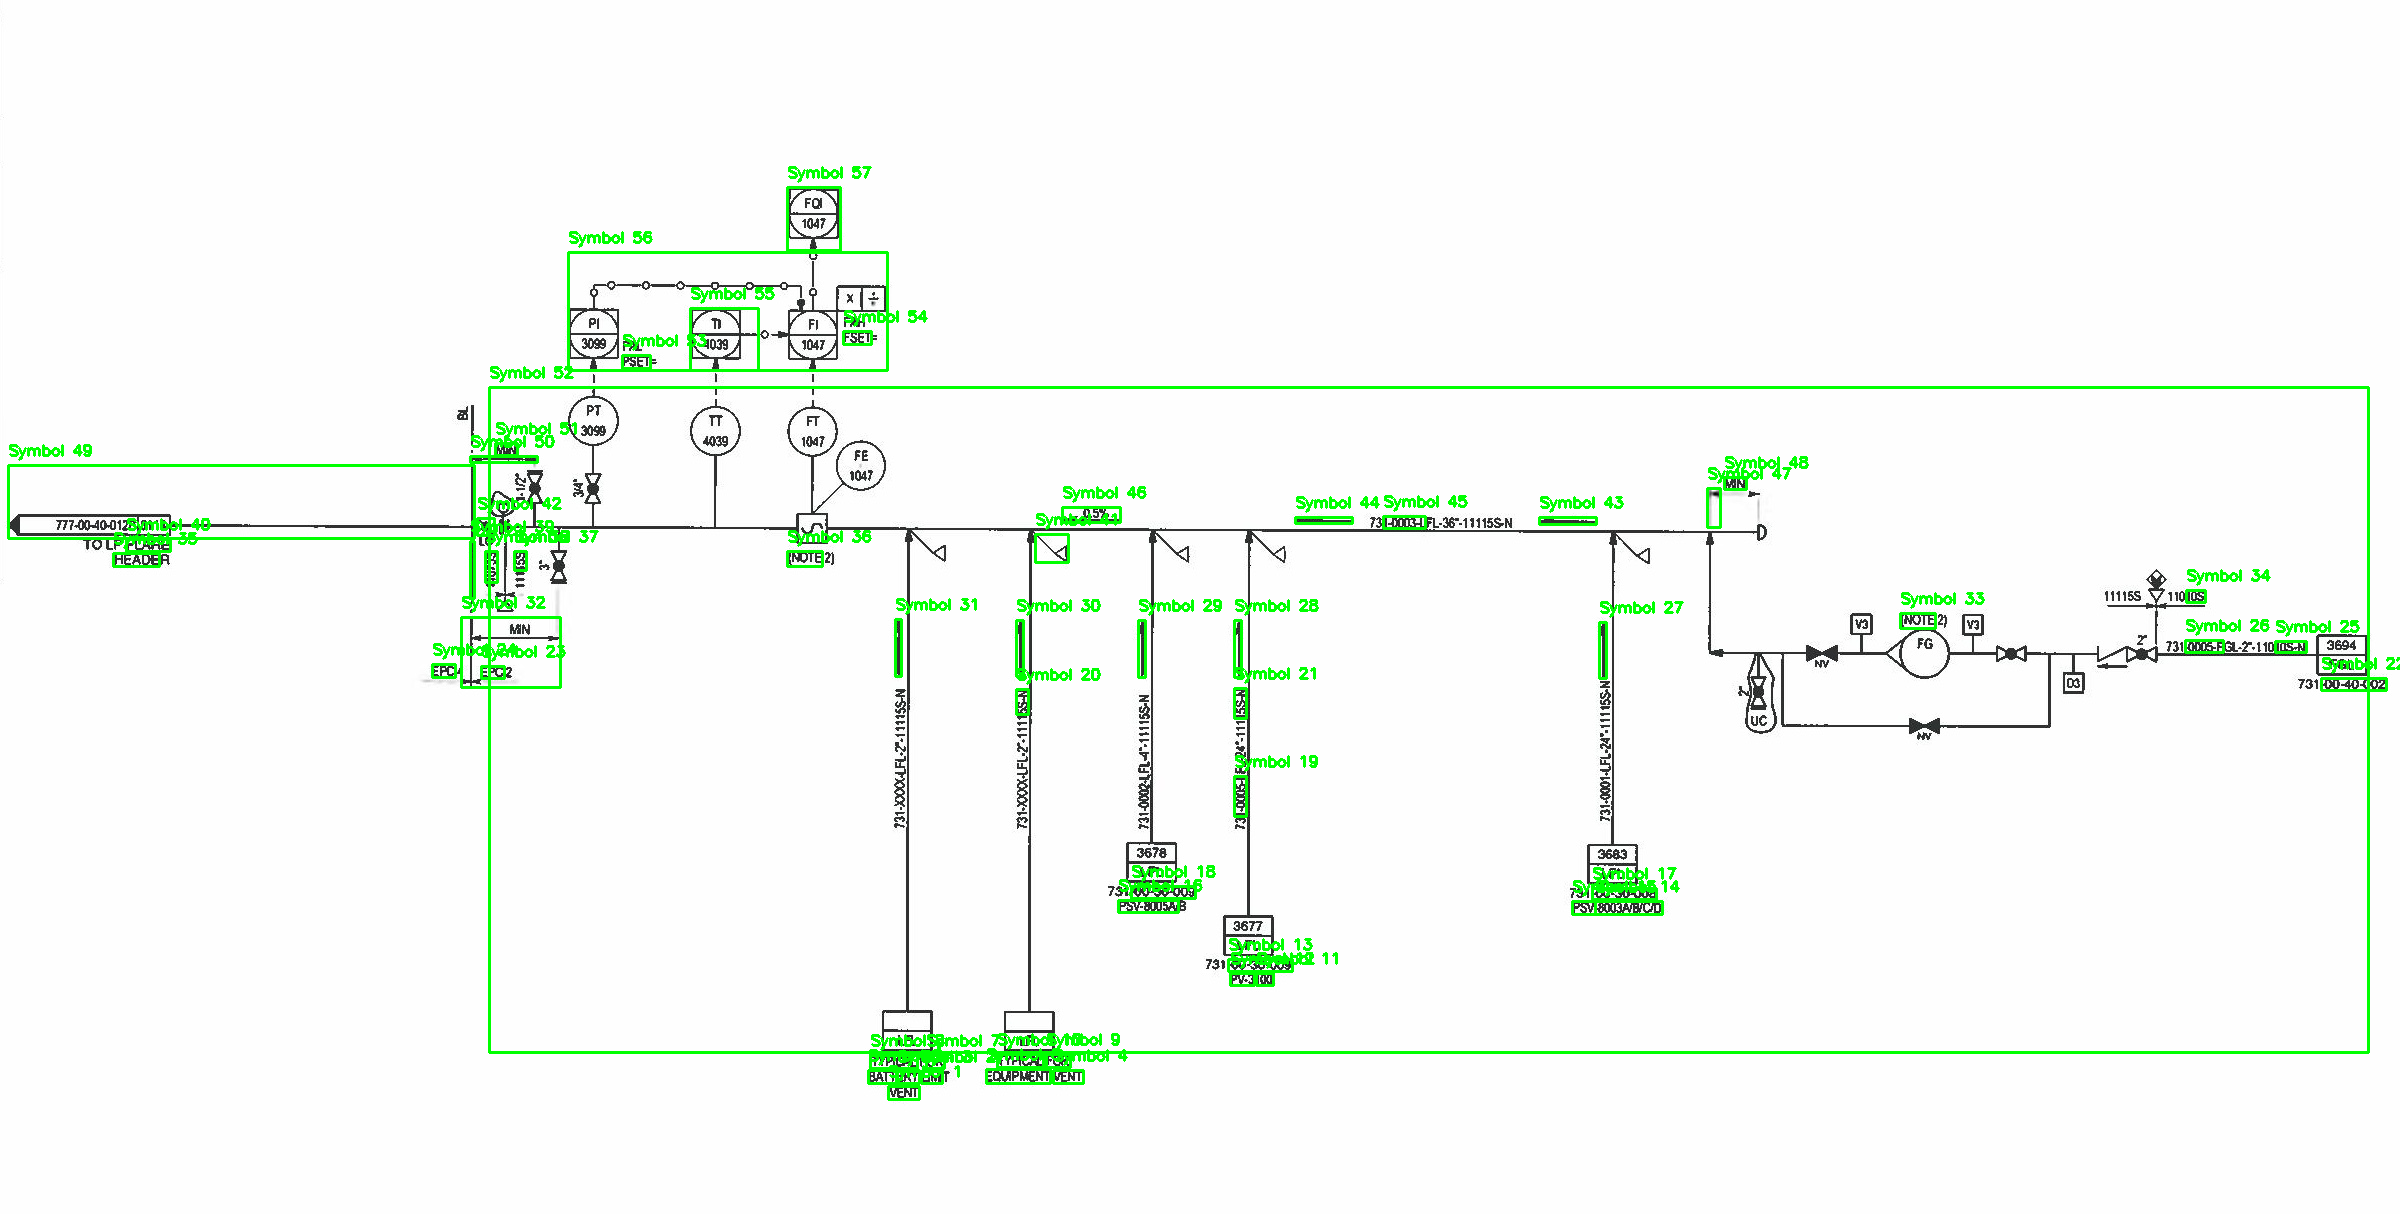


Bounding box coordinates (x, y, width, height):
Symbol 1: (888, 1086, 31, 13)
Symbol 2: (921, 1071, 21, 12)
Symbol 3: (897, 1071, 22, 12)
Symbol 4: (1053, 1070, 30, 13)
Symbol 5: (868, 1070, 28, 13)
Symbol 6: (986, 1069, 64, 14)
Symbol 7: (926, 1055, 18, 13)
Symbol 8: (870, 1055, 47, 13)
Symbol 9: (1046, 1054, 24, 13)
Symbol 10: (997, 1054, 46, 13)
Symbol 11: (1256, 973, 17, 12)
Symbol 12: (1230, 973, 24, 12)
Symbol 13: (1228, 959, 64, 12)
Symbol 14: (1595, 901, 67, 13)
Symbol 15: (1572, 901, 23, 13)
Symbol 16: (1118, 900, 60, 12)
Symbol 17: (1592, 888, 64, 11)
Symbol 18: (1131, 886, 64, 12)
Symbol 19: (1234, 776, 12, 40)
Symbol 20: (1016, 689, 12, 25)
Symbol 21: (1234, 688, 12, 30)
Symbol 22: (2321, 678, 65, 12)
Symbol 23: (481, 666, 23, 12)
Symbol 24: (432, 664, 23, 13)
Symbol 25: (2275, 641, 31, 11)
Symbol 26: (2185, 640, 38, 12)
Symbol 27: (1599, 622, 7, 56)
Symbol 28: (1234, 620, 7, 57)
Symbol 29: (1138, 620, 7, 57)
Symbol 30: (1016, 620, 7, 56)
Symbol 31: (895, 619, 6, 57)
Symbo

In [ ]:
# Install OpenCV if not already installed
!pip install opencv-python

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the P&ID image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read the image
img = cv2.imread(image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Adaptive thresholding
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY_INV, 11, 2)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for drawing
output = img.copy()

# Minimum area threshold to filter out small noise
min_area = 100

# List to store symbol bounding boxes
symbols = []

for contour in contours:
    # Calculate contour area
    area = cv2.contourArea(contour)

    if area > min_area:
        # Get bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)

        # Store symbol coordinates
        symbols.append((x, y, w, h))

        # Draw rectangle around detected symbol
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Optional: Add label with symbol number
        cv2.putText(output, f'Symbol {len(symbols)}', (x, y-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display results
print(f"Number of symbols detected: {len(symbols)}")
cv2_imshow(output)

# Optional: Save the output image
cv2.imwrite('pid_symbols_detected.jpg', output)

# Print bounding box coordinates
print("\nBounding box coordinates (x, y, width, height):")
for i, (x, y, w, h) in enumerate(symbols, 1):
    print(f"Symbol {i}: ({x}, {y}, {w}, {h})")

Saving input.png to input (6).png


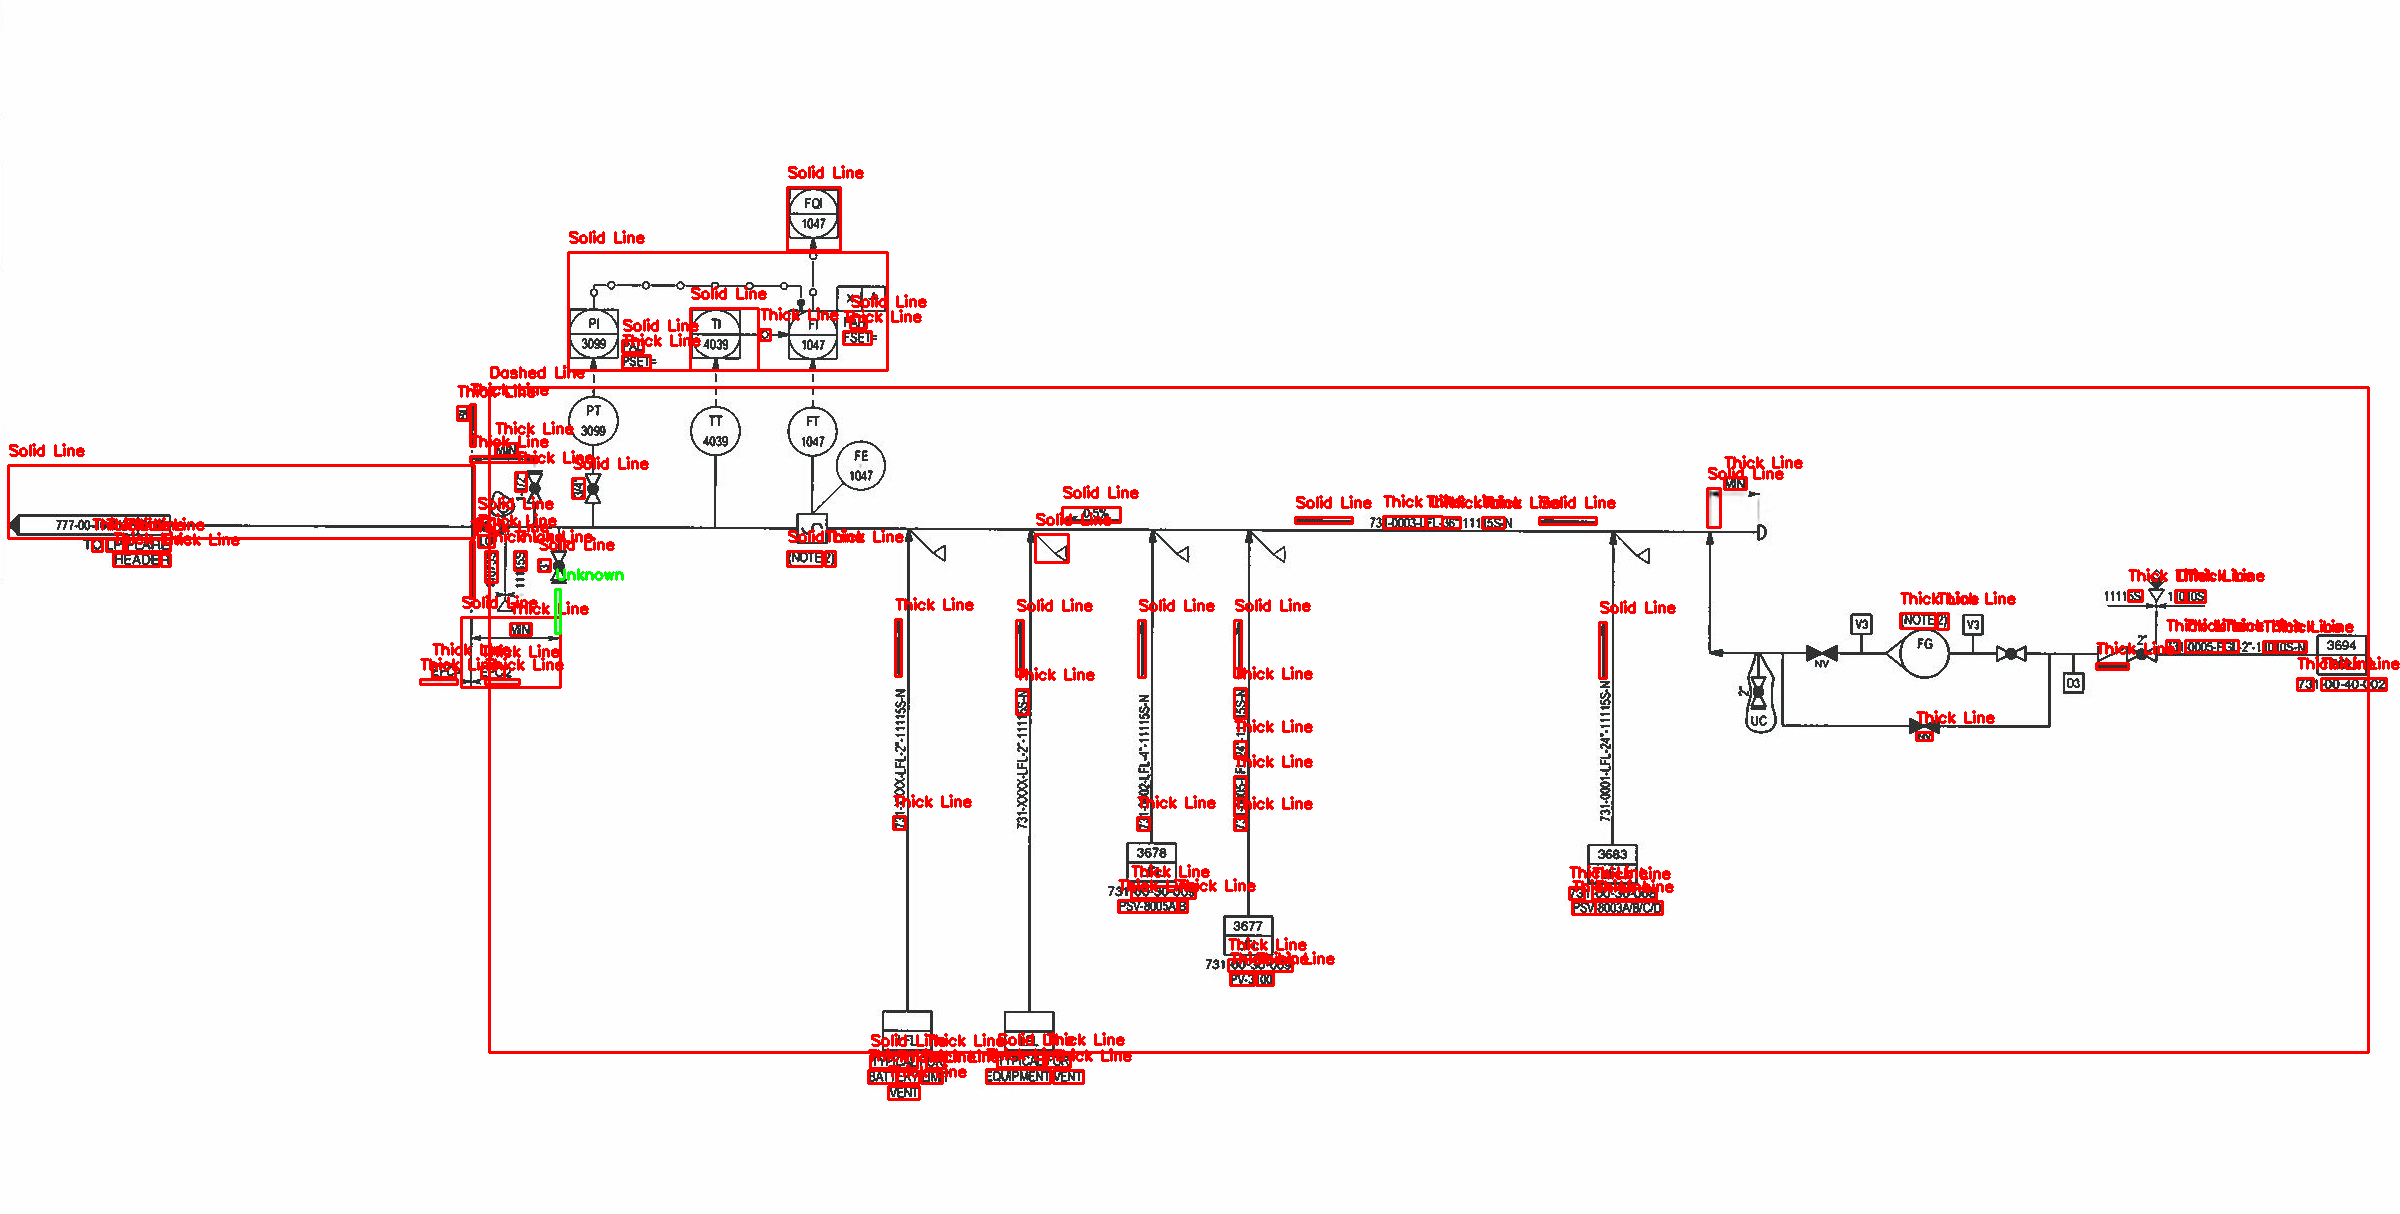


Detected Symbols:
Thick Line: 68 instances
  1. Position: (888, 1086), Size: (31x13)
  2. Position: (921, 1071), Size: (21x12)
  3. Position: (897, 1071), Size: (22x12)
  4. Position: (1053, 1070), Size: (30x13)
  5. Position: (868, 1070), Size: (28x13)
  6. Position: (986, 1069), Size: (64x14)
  7. Position: (926, 1055), Size: (18x13)
  8. Position: (1046, 1054), Size: (24x13)
  9. Position: (1256, 973), Size: (17x12)
  10. Position: (1230, 973), Size: (24x12)
  11. Position: (1228, 959), Size: (64x12)
  12. Position: (1595, 901), Size: (67x13)
  13. Position: (1572, 901), Size: (23x13)
  14. Position: (1177, 900), Size: (10x12)
  15. Position: (1118, 900), Size: (60x12)
  16. Position: (1592, 888), Size: (64x11)
  17. Position: (1569, 887), Size: (15x12)
  18. Position: (1131, 886), Size: (64x12)
  19. Position: (1234, 818), Size: (12x12)
  20. Position: (1137, 817), Size: (12x13)
  21. Position: (893, 816), Size: (12x13)
  22. Position: (1234, 776), Size: (12x40)
  23. Position: (1

In [ ]:
!pip install opencv-python numpy

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the P&ID image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read and preprocess image
img = cv2.imread(image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY_INV, 11, 2)

# Edge detection for line types
edges = cv2.Canny(gray, 50, 150)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

# Symbol classification function
def classify_symbol(contour, edges):
    x, y, w, h = cv2.boundingRect(contour)
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Aspect ratio
    aspect = float(w)/h if h != 0 else 0

    # Get ROI from edges for line analysis
    roi = edges[y:y+h, x:x+w]

    # Line types
    line_thickness = np.mean(roi) if roi.size > 0 else 0
    if line_thickness > 10:
        if cv2.countNonZero(roi) / (w*h) > 0.3:
            return "Thick Line"
        return "Solid Line"
    elif line_thickness > 2:
        if cv2.countNonZero(roi) / (w*h) < 0.2:
            return "Dashed Line"
        return "Thin Line"

    # Simple shape analysis
    approx = cv2.approxPolyDP(contour, 0.02*perimeter, True)
    vertices = len(approx)

    # Valves and specific symbols
    if area > 1000:  # Larger symbols
        if vertices == 4 and 0.8 < aspect < 1.2:
            return "Tank/Vessel"
        elif vertices > 6 and 0.8 < aspect < 1.2:
            return "Instrument Circle"
    elif area > 200:  # Medium symbols
        if vertices == 3:
            return "Arrow" if aspect > 1.5 else "Gate Valve"
        elif vertices == 4:
            return "Cross" if 0.8 < aspect < 1.2 else "Reducer"
        elif vertices == 5:
            return "Tee"
        elif vertices > 6:
            return "Circle (Valve/Pump)"

    # More specific symbol detection
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        if area > 50 and area < 500:
            if vertices == 4 and aspect > 2:
                return "Flange"
            elif vertices > 8 and 0.8 < aspect < 1.2:
                return "Pump"

    return "Unknown"

# Symbol detection and classification
symbols = {}
min_area = 50

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        x, y, w, h = cv2.boundingRect(contour)
        symbol_type = classify_symbol(contour, edges)

        if symbol_type not in symbols:
            symbols[symbol_type] = []
        symbols[symbol_type].append((x, y, w, h))

        # Draw bounding box and label
        color = (0, 255, 0)  # Green for most symbols
        if "Valve" in symbol_type:
            color = (255, 0, 0)  # Blue for valves
        elif "Line" in symbol_type:
            color = (0, 0, 255)  # Red for lines

        cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)
        cv2.putText(output, symbol_type, (x, y-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display results
cv2_imshow(output)
cv2.imwrite('pid_symbols_classified.jpg', output)

# Print summary
print("\nDetected Symbols:")
for symbol_type, boxes in symbols.items():
    print(f"{symbol_type}: {len(boxes)} instances")
    for i, (x, y, w, h) in enumerate(boxes, 1):
        print(f"  {i}. Position: ({x}, {y}), Size: ({w}x{h})")

Saving input.png to input (7).png


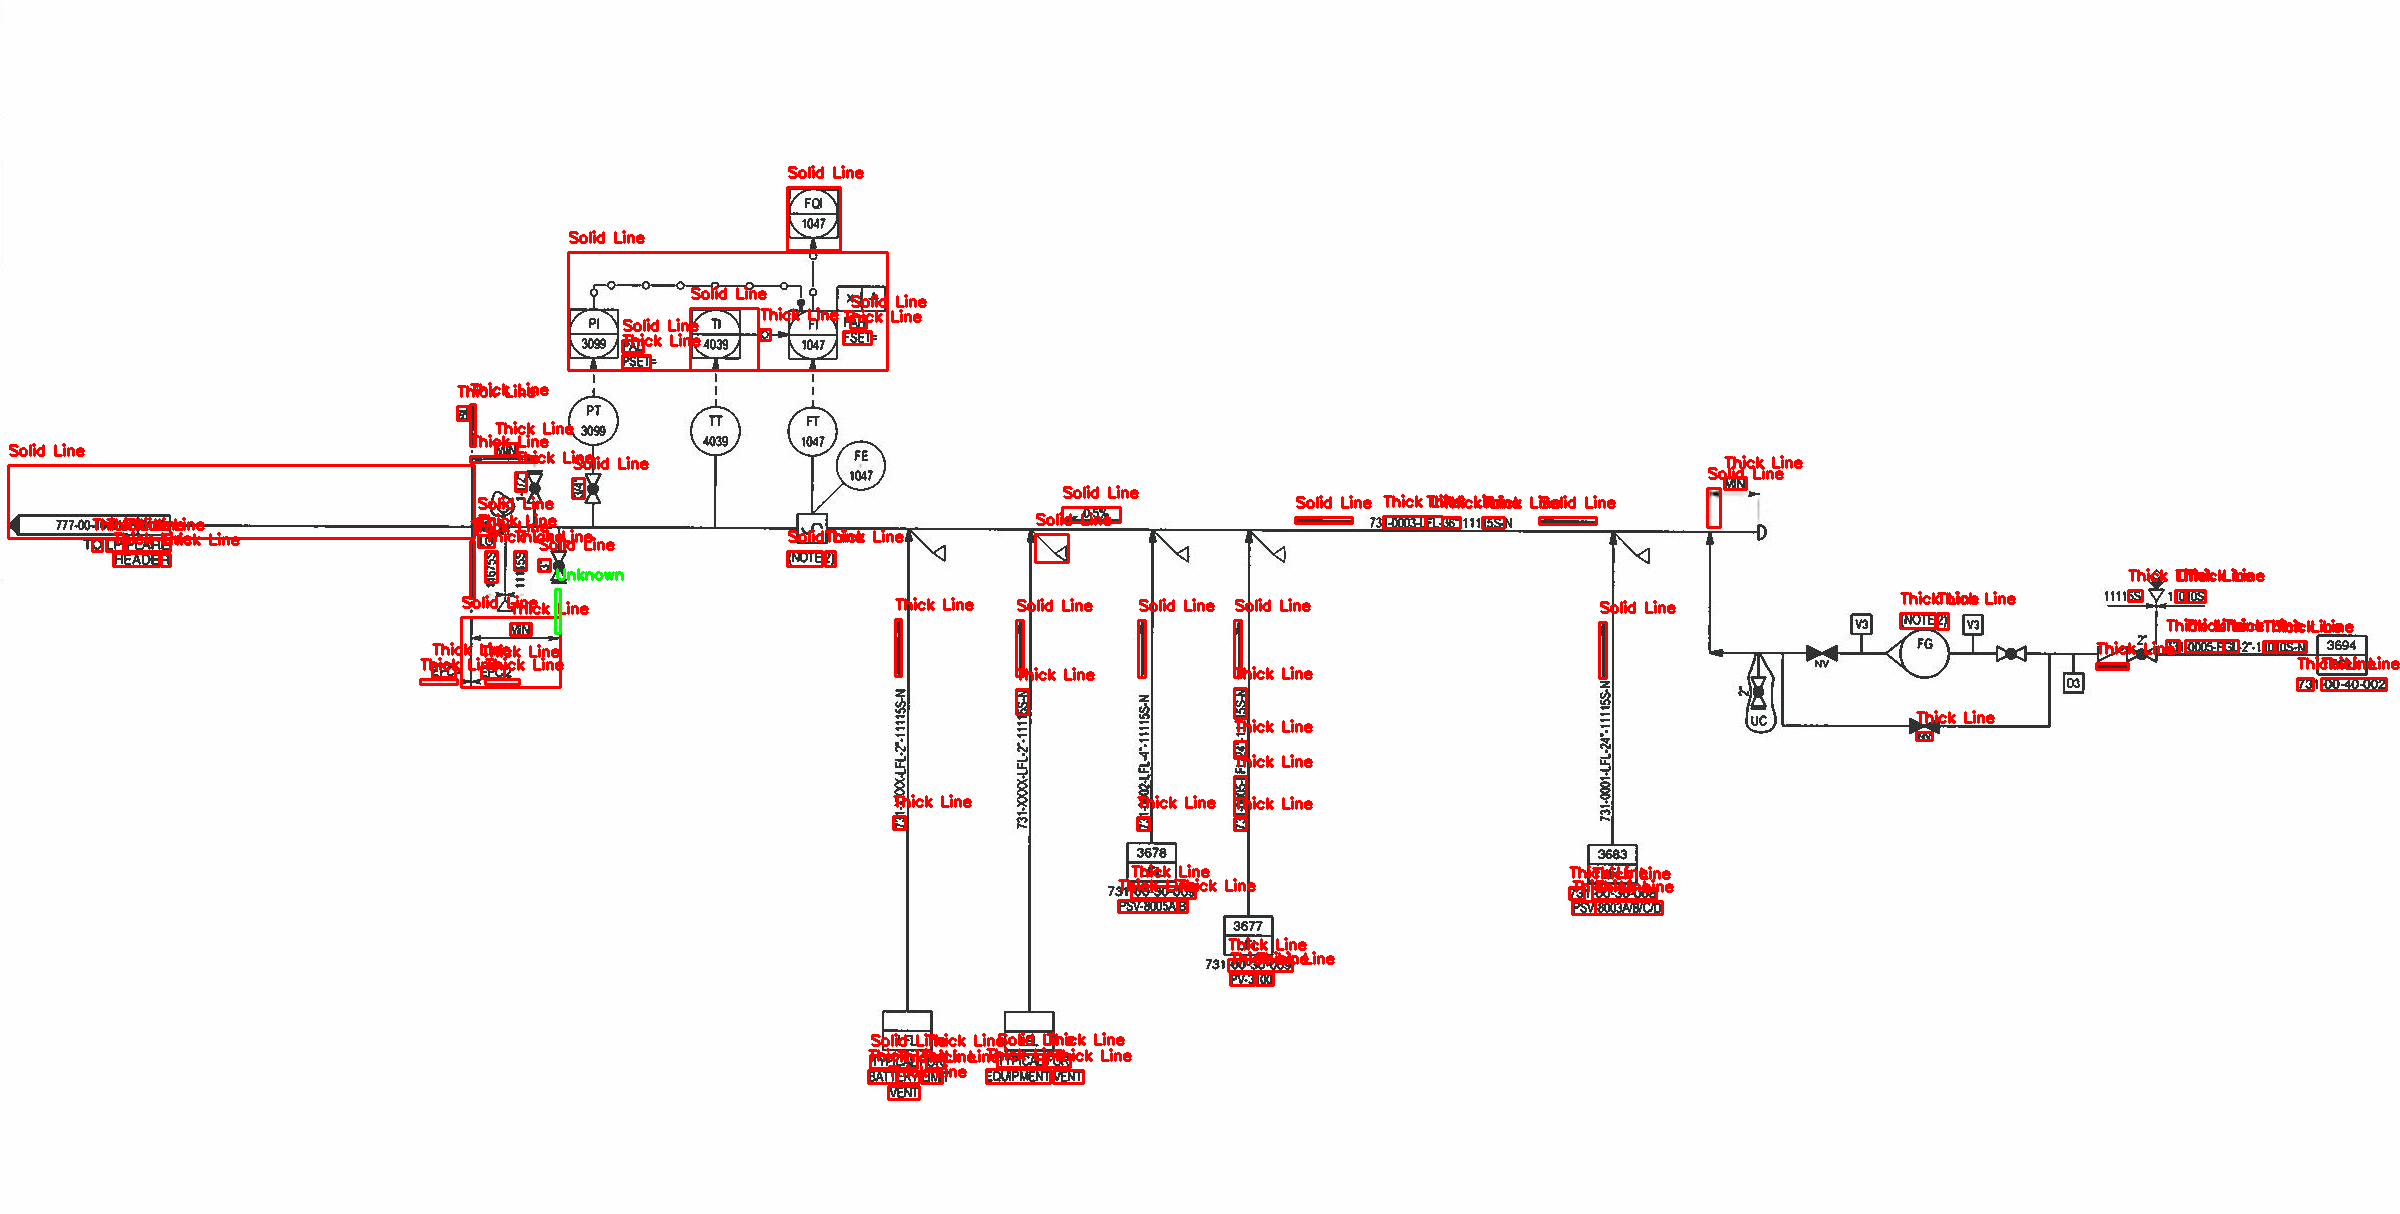


Detected Symbols:
Thick Line: 68 instances
  1. Position: (888, 1086), Size: (31x13)
  2. Position: (921, 1071), Size: (21x12)
  3. Position: (897, 1071), Size: (22x12)
  4. Position: (1053, 1070), Size: (30x13)
  5. Position: (868, 1070), Size: (28x13)
  6. Position: (986, 1069), Size: (64x14)
  7. Position: (926, 1055), Size: (18x13)
  8. Position: (1046, 1054), Size: (24x13)
  9. Position: (1256, 973), Size: (17x12)
  10. Position: (1230, 973), Size: (24x12)
  11. Position: (1228, 959), Size: (64x12)
  12. Position: (1595, 901), Size: (67x13)
  13. Position: (1572, 901), Size: (23x13)
  14. Position: (1177, 900), Size: (10x12)
  15. Position: (1118, 900), Size: (60x12)
  16. Position: (1592, 888), Size: (64x11)
  17. Position: (1569, 887), Size: (15x12)
  18. Position: (1131, 886), Size: (64x12)
  19. Position: (1234, 818), Size: (12x12)
  20. Position: (1137, 817), Size: (12x13)
  21. Position: (893, 816), Size: (12x13)
  22. Position: (1234, 776), Size: (12x40)
  23. Position: (1

In [ ]:
!pip install opencv-python numpy

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the P&ID image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read and preprocess image
img = cv2.imread(image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY_INV, 11, 2)

# Edge detection for line types
edges = cv2.Canny(gray, 50, 150)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

# Get image dimensions
img_height, img_width = img.shape[:2]
max_width = img_width / 2
max_height = img_height / 2

# Symbol classification function
def classify_symbol(contour, edges):
    x, y, w, h = cv2.boundingRect(contour)
    # Check if bounding box exceeds half the image
    if w > max_width or h > max_height:
        return None

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    aspect = float(w)/h if h != 0 else 0
    roi = edges[y:y+h, x:x+w]

    # Line types
    line_thickness = np.mean(roi) if roi.size > 0 else 0
    if line_thickness > 10:
        if cv2.countNonZero(roi) / (w*h) > 0.3:
            return "Thick Line"
        return "Solid Line"
    elif line_thickness > 2:
        if cv2.countNonZero(roi) / (w*h) < 0.2:
            return "Dashed Line"
        return "Thin Line"

    # Simple shape analysis
    approx = cv2.approxPolyDP(contour, 0.02*perimeter, True)
    vertices = len(approx)

    # Valves and specific symbols
    if area > 1000:
        if vertices == 4 and 0.8 < aspect < 1.2:
            return "Tank/Vessel"
        elif vertices > 6 and 0.8 < aspect < 1.2:
            return "Instrument Circle"
    elif area > 200:
        if vertices == 3:
            return "Arrow" if aspect > 1.5 else "Gate Valve"
        elif vertices == 4:
            return "Cross" if 0.8 < aspect < 1.2 else "Reducer"
        elif vertices == 5:
            return "Tee"
        elif vertices > 6:
            return "Circle (Valve/Pump)"

    # More specific symbol detection
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        if area > 50 and area < 500:
            if vertices == 4 and aspect > 2:
                return "Flange"
            elif vertices > 8 and 0.8 < aspect < 1.2:
                return "Pump"

    return "Unknown"

# Symbol detection and classification
symbols = {}
min_area = 50

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        x, y, w, h = cv2.boundingRect(contour)
        symbol_type = classify_symbol(contour, edges)

        # Only process if symbol is identified and within size limits
        if symbol_type and w <= max_width and h <= max_height:
            if symbol_type not in symbols:
                symbols[symbol_type] = []
            symbols[symbol_type].append((x, y, w, h))

            # Draw bounding box and label
            color = (0, 255, 0)  # Green for most symbols
            if "Valve" in symbol_type:
                color = (255, 0, 0)  # Blue for valves
            elif "Line" in symbol_type:
                color = (0, 0, 255)  # Red for lines

            cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)
            cv2.putText(output, symbol_type, (x, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display results
cv2_imshow(output)
cv2.imwrite('pid_symbols_classified.jpg', output)

# Print summary
print("\nDetected Symbols:")
for symbol_type, boxes in symbols.items():
    print(f"{symbol_type}: {len(boxes)} instances")
    for i, (x, y, w, h) in enumerate(boxes, 1):
        print(f"  {i}. Position: ({x}, {y}), Size: ({w}x{h})")

Saving input.png to input (8).png


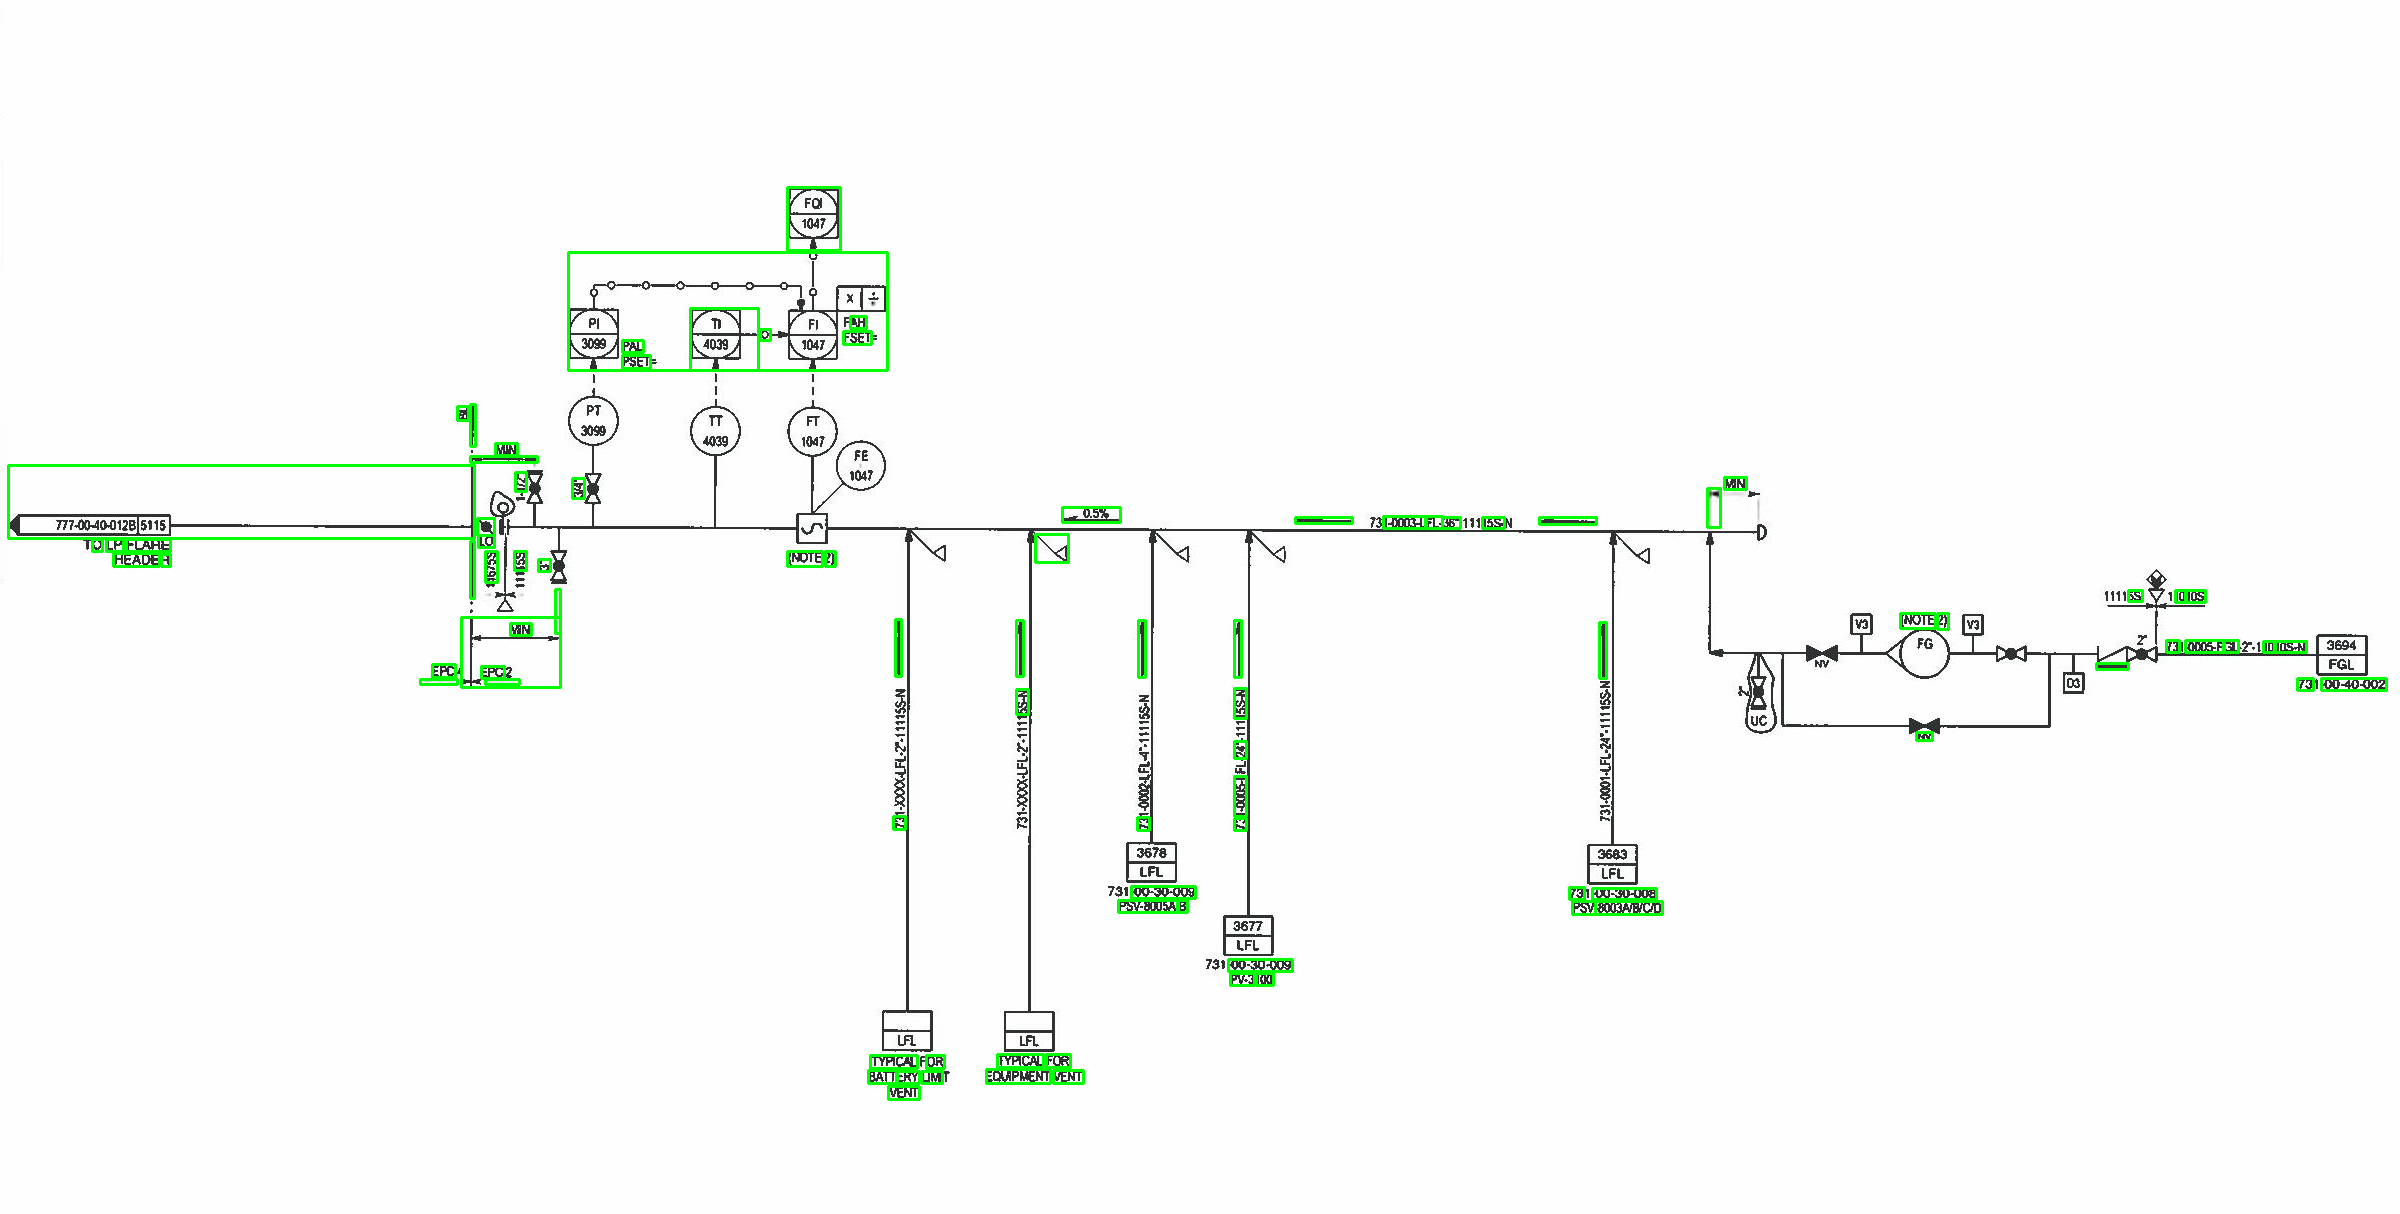


Detected Symbols (coordinates only):
Thick Line: 68 instances
  1. Position: (888, 1086), Size: (31x13)
  2. Position: (921, 1071), Size: (21x12)
  3. Position: (897, 1071), Size: (22x12)
  4. Position: (1053, 1070), Size: (30x13)
  5. Position: (868, 1070), Size: (28x13)
  6. Position: (986, 1069), Size: (64x14)
  7. Position: (926, 1055), Size: (18x13)
  8. Position: (1046, 1054), Size: (24x13)
  9. Position: (1256, 973), Size: (17x12)
  10. Position: (1230, 973), Size: (24x12)
  11. Position: (1228, 959), Size: (64x12)
  12. Position: (1595, 901), Size: (67x13)
  13. Position: (1572, 901), Size: (23x13)
  14. Position: (1177, 900), Size: (10x12)
  15. Position: (1118, 900), Size: (60x12)
  16. Position: (1592, 888), Size: (64x11)
  17. Position: (1569, 887), Size: (15x12)
  18. Position: (1131, 886), Size: (64x12)
  19. Position: (1234, 818), Size: (12x12)
  20. Position: (1137, 817), Size: (12x13)
  21. Position: (893, 816), Size: (12x13)
  22. Position: (1234, 776), Size: (12x40)

In [ ]:
!pip install opencv-python numpy

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the P&ID image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read and preprocess image
img = cv2.imread(image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY_INV, 11, 2)

# Edge detection for line types
edges = cv2.Canny(gray, 50, 150)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

# Get image dimensions
img_height, img_width = img.shape[:2]
max_width = img_width / 2
max_height = img_height / 2

# Symbol classification function (kept for consistency but not used for labeling)
def classify_symbol(contour, edges):
    x, y, w, h = cv2.boundingRect(contour)
    if w > max_width or h > max_height:
        return None

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    aspect = float(w)/h if h != 0 else 0
    roi = edges[y:y+h, x:x+w]

    line_thickness = np.mean(roi) if roi.size > 0 else 0
    if line_thickness > 10:
        if cv2.countNonZero(roi) / (w*h) > 0.3:
            return "Thick Line"
        return "Solid Line"
    elif line_thickness > 2:
        if cv2.countNonZero(roi) / (w*h) < 0.2:
            return "Dashed Line"
        return "Thin Line"

    approx = cv2.approxPolyDP(contour, 0.02*perimeter, True)
    vertices = len(approx)

    if area > 1000:
        if vertices == 4 and 0.8 < aspect < 1.2:
            return "Tank/Vessel"
        elif vertices > 6 and 0.8 < aspect < 1.2:
            return "Instrument Circle"
    elif area > 200:
        if vertices == 3:
            return "Arrow" if aspect > 1.5 else "Gate Valve"
        elif vertices == 4:
            return "Cross" if 0.8 < aspect < 1.2 else "Reducer"
        elif vertices == 5:
            return "Tee"
        elif vertices > 6:
            return "Circle (Valve/Pump)"

    M = cv2.moments(contour)
    if M["m00"] != 0:
        if area > 50 and area < 500:
            if vertices == 4 and aspect > 2:
                return "Flange"
            elif vertices > 8 and 0.8 < aspect < 1.2:
                return "Pump"

    return "Unknown"

# Symbol detection with only bounding boxes
symbols = {}
min_area = 50

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        x, y, w, h = cv2.boundingRect(contour)
        symbol_type = classify_symbol(contour, edges)

        if symbol_type and w <= max_width and h <= max_height:
            if symbol_type not in symbols:
                symbols[symbol_type] = []
            symbols[symbol_type].append((x, y, w, h))

            # Draw only bounding box
            color = (0, 255, 0)  # Green for all symbols
            cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)

# Display results
cv2_imshow(output)
cv2.imwrite('pid_symbols_bounding_only.jpg', output)

# Print summary (optional, can be removed if not needed)
print("\nDetected Symbols (coordinates only):")
for symbol_type, boxes in symbols.items():
    print(f"{symbol_type}: {len(boxes)} instances")
    for i, (x, y, w, h) in enumerate(boxes, 1):
        print(f"  {i}. Position: ({x}, {y}), Size: ({w}x{h})")

Saving input.png to input (17).png


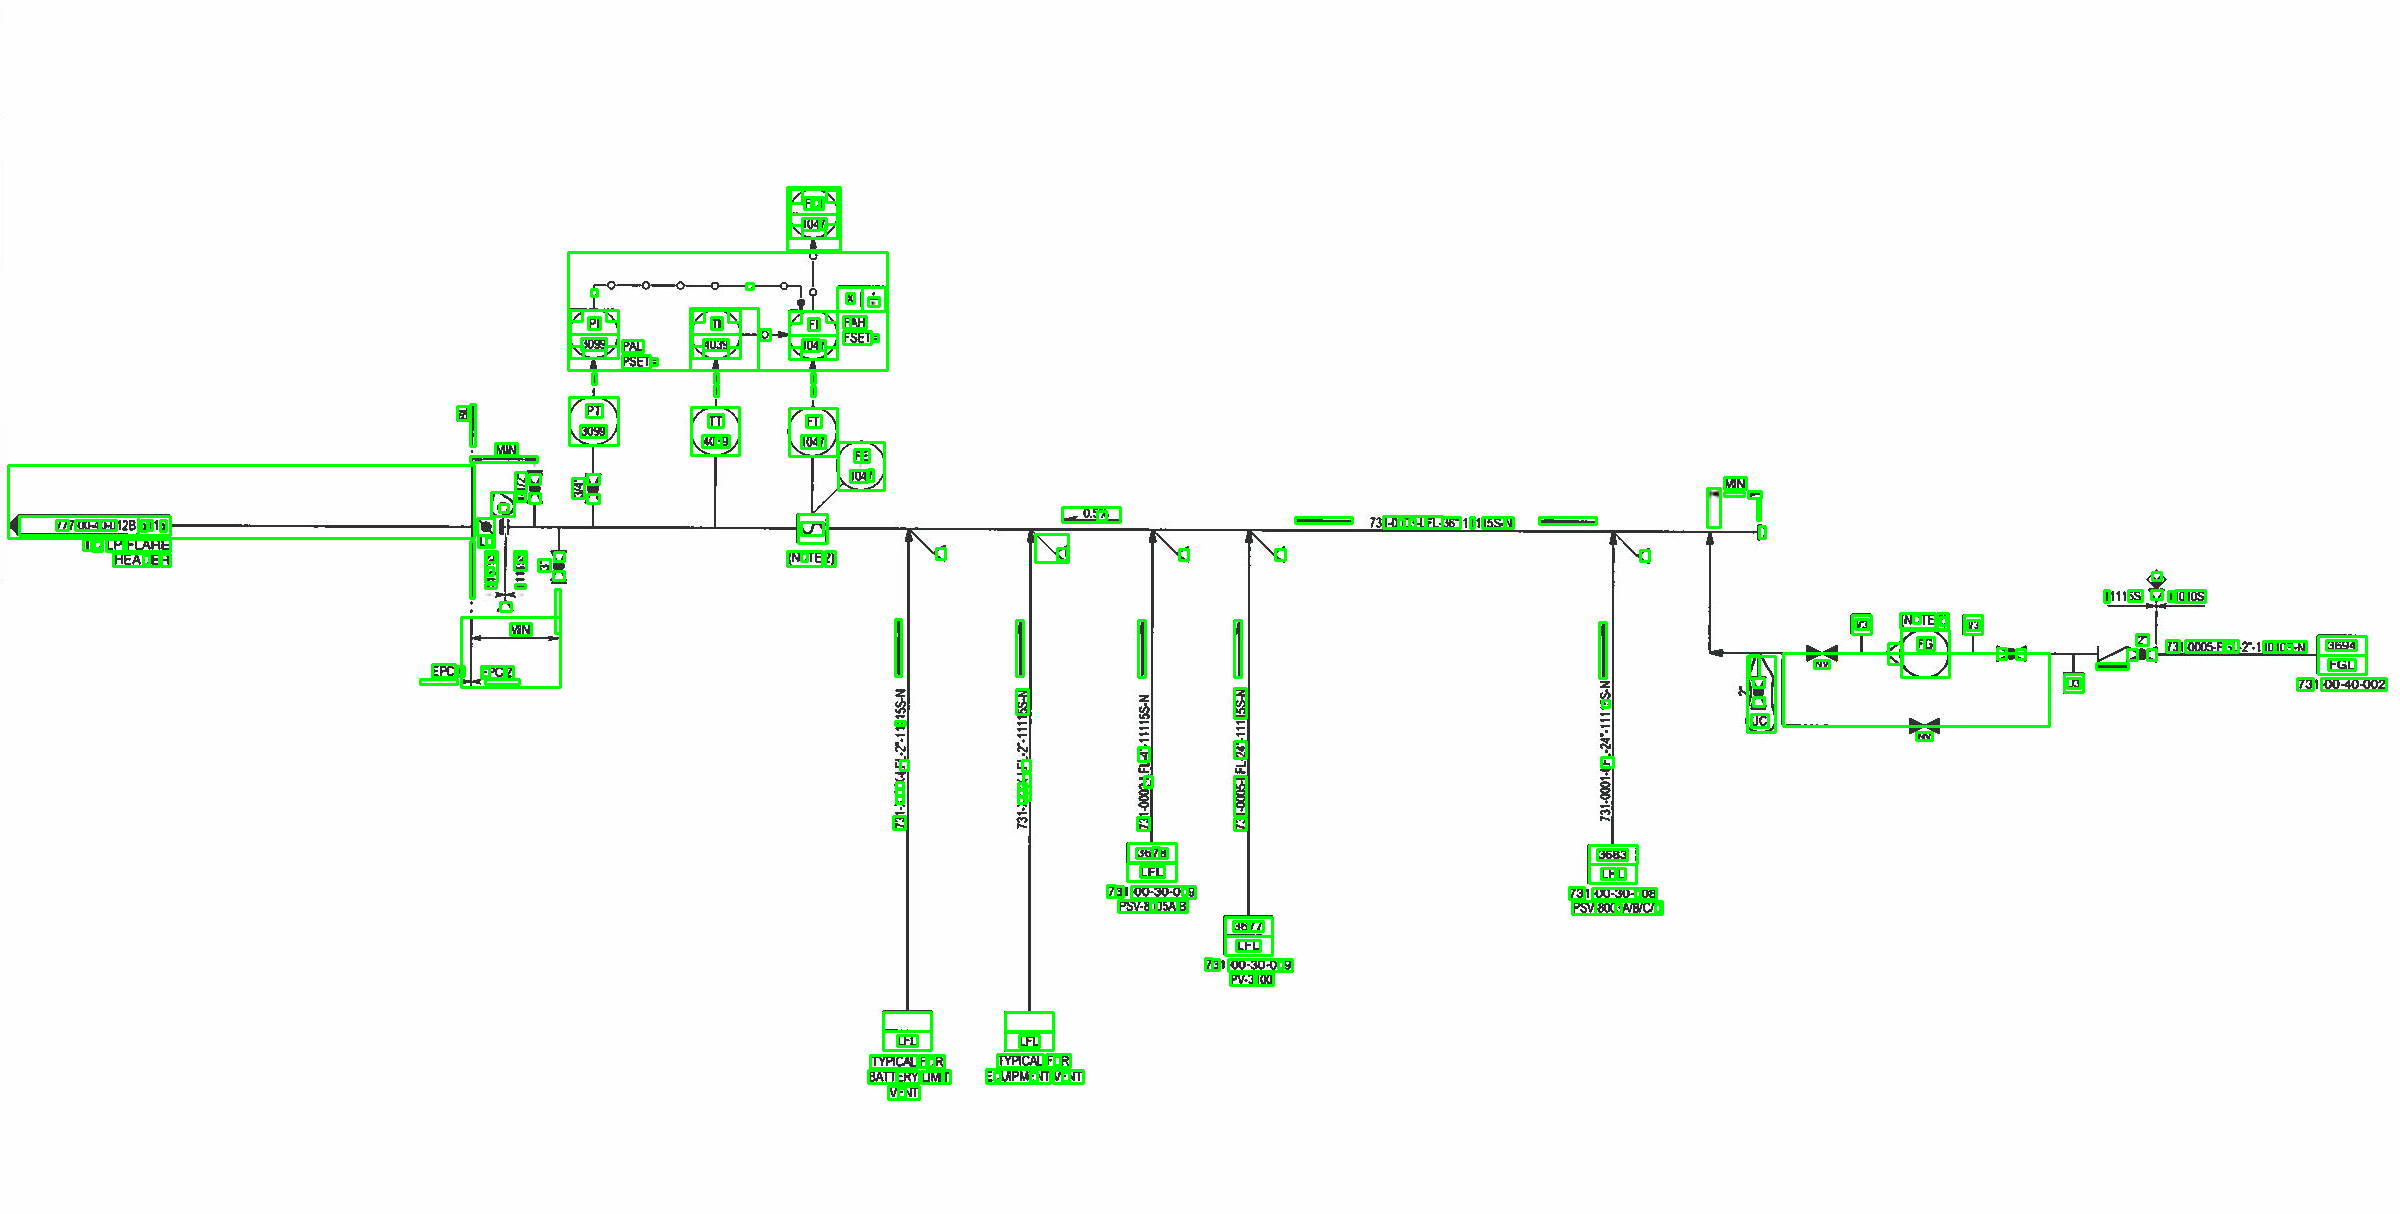


Detected Symbols (coordinates only):
Thick Line: 140 instances
  1. Position: (898, 1088), Size: (7x9)
  2. Position: (888, 1086), Size: (31x13)
  3. Position: (1062, 1072), Size: (7x9)
  4. Position: (1030, 1072), Size: (7x9)
  5. Position: (921, 1071), Size: (21x12)
  6. Position: (897, 1071), Size: (22x12)
  7. Position: (1053, 1070), Size: (30x13)
  8. Position: (943, 1070), Size: (7x13)
  9. Position: (868, 1070), Size: (28x13)
  10. Position: (986, 1069), Size: (64x14)
  11. Position: (926, 1055), Size: (18x13)
  12. Position: (919, 1055), Size: (7x12)
  13. Position: (1046, 1054), Size: (24x13)
  14. Position: (1019, 1035), Size: (20x12)
  15. Position: (897, 1035), Size: (20x11)
  16. Position: (1256, 973), Size: (17x12)
  17. Position: (1230, 973), Size: (24x12)
  18. Position: (1228, 959), Size: (64x12)
  19. Position: (1212, 959), Size: (7x11)
  20. Position: (1249, 921), Size: (14x10)
  21. Position: (1233, 921), Size: (15x10)
  22. Position: (1595, 901), Size: (67x13)
  2

In [ ]:
# Install required libraries (if not already installed)
!pip install opencv-python numpy

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the P&ID image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read and preprocess the image
img = cv2.imread(image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Edge detection for line analysis
edges = cv2.Canny(gray, 50, 150)

# Find contours using RETR_LIST to detect all contours, including nested ones
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

# Get image dimensions and set size constraints
img_height, img_width = img.shape[:2]
max_width = img_width / 2
max_height = img_height / 2

# Function to classify symbols
def classify_symbol(contour, edges):
    x, y, w, h = cv2.boundingRect(contour)
    if w > max_width or h > max_height:
        return None

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    aspect = float(w) / h if h != 0 else 0
    roi = edges[y:y+h, x:x+w]

    # Approximate the shape
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    vertices = len(approx)

    # Circle detection
    circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0
    if vertices >= 6 and circularity > 0.7:
        if area < 200:
            return "Small Circle"
        return "Circle"

    # Triangle detection
    if vertices == 3:
        return "Triangle"

    # Other shapes (e.g., square, rectangle)
    if vertices == 4:
        if 0.95 < aspect < 1.05:
            return "Square"
        return "Rectangle"

    # Line types (optional for P&ID context)
    line_thickness = np.mean(roi) if roi.size > 0 else 0
    if line_thickness > 10:
        if cv2.countNonZero(roi) / (w * h) > 0.3:
            return "Thick Line"
        return "Solid Line"
    elif line_thickness > 2:
        if cv2.countNonZero(roi) / (w * h) < 0.2:
            return "Dashed Line"
        return "Thin Line"

    # P&ID-specific symbols (examples)
    if area > 1000:
        if vertices == 4 and 0.8 < aspect < 1.2:
            return "Tank/Vessel"
        elif vertices > 6 and 0.8 < aspect < 1.2:
            return "Instrument Circle"
    elif area > 200:
        if vertices == 3 and aspect > 1.5:
            return "Arrow"
        elif vertices == 4 and 0.8 < aspect < 1.2:
            return "Cross"

    return "Unknown"

# Detect and bound symbols
symbols = {}
min_area = 20  # Minimum area to detect small symbols

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        x, y, w, h = cv2.boundingRect(contour)
        symbol_type = classify_symbol(contour, edges)

        if symbol_type and w <= max_width and h <= max_height:
            if symbol_type not in symbols:
                symbols[symbol_type] = []
            symbols[symbol_type].append((x, y, w, h))

            # Draw green bounding box
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2_imshow(output)
cv2.imwrite('pid_symbols_bounding_only.jpg', output)

# Print detected symbols summary
print("\nDetected Symbols (coordinates only):")
for symbol_type, boxes in symbols.items():
    print(f"{symbol_type}: {len(boxes)} instances")
    for i, (x, y, w, h) in enumerate(boxes, 1):
        print(f"  {i}. Position: ({x}, {y}), Size: ({w}x{h})")

Saving input.png to input (19).png


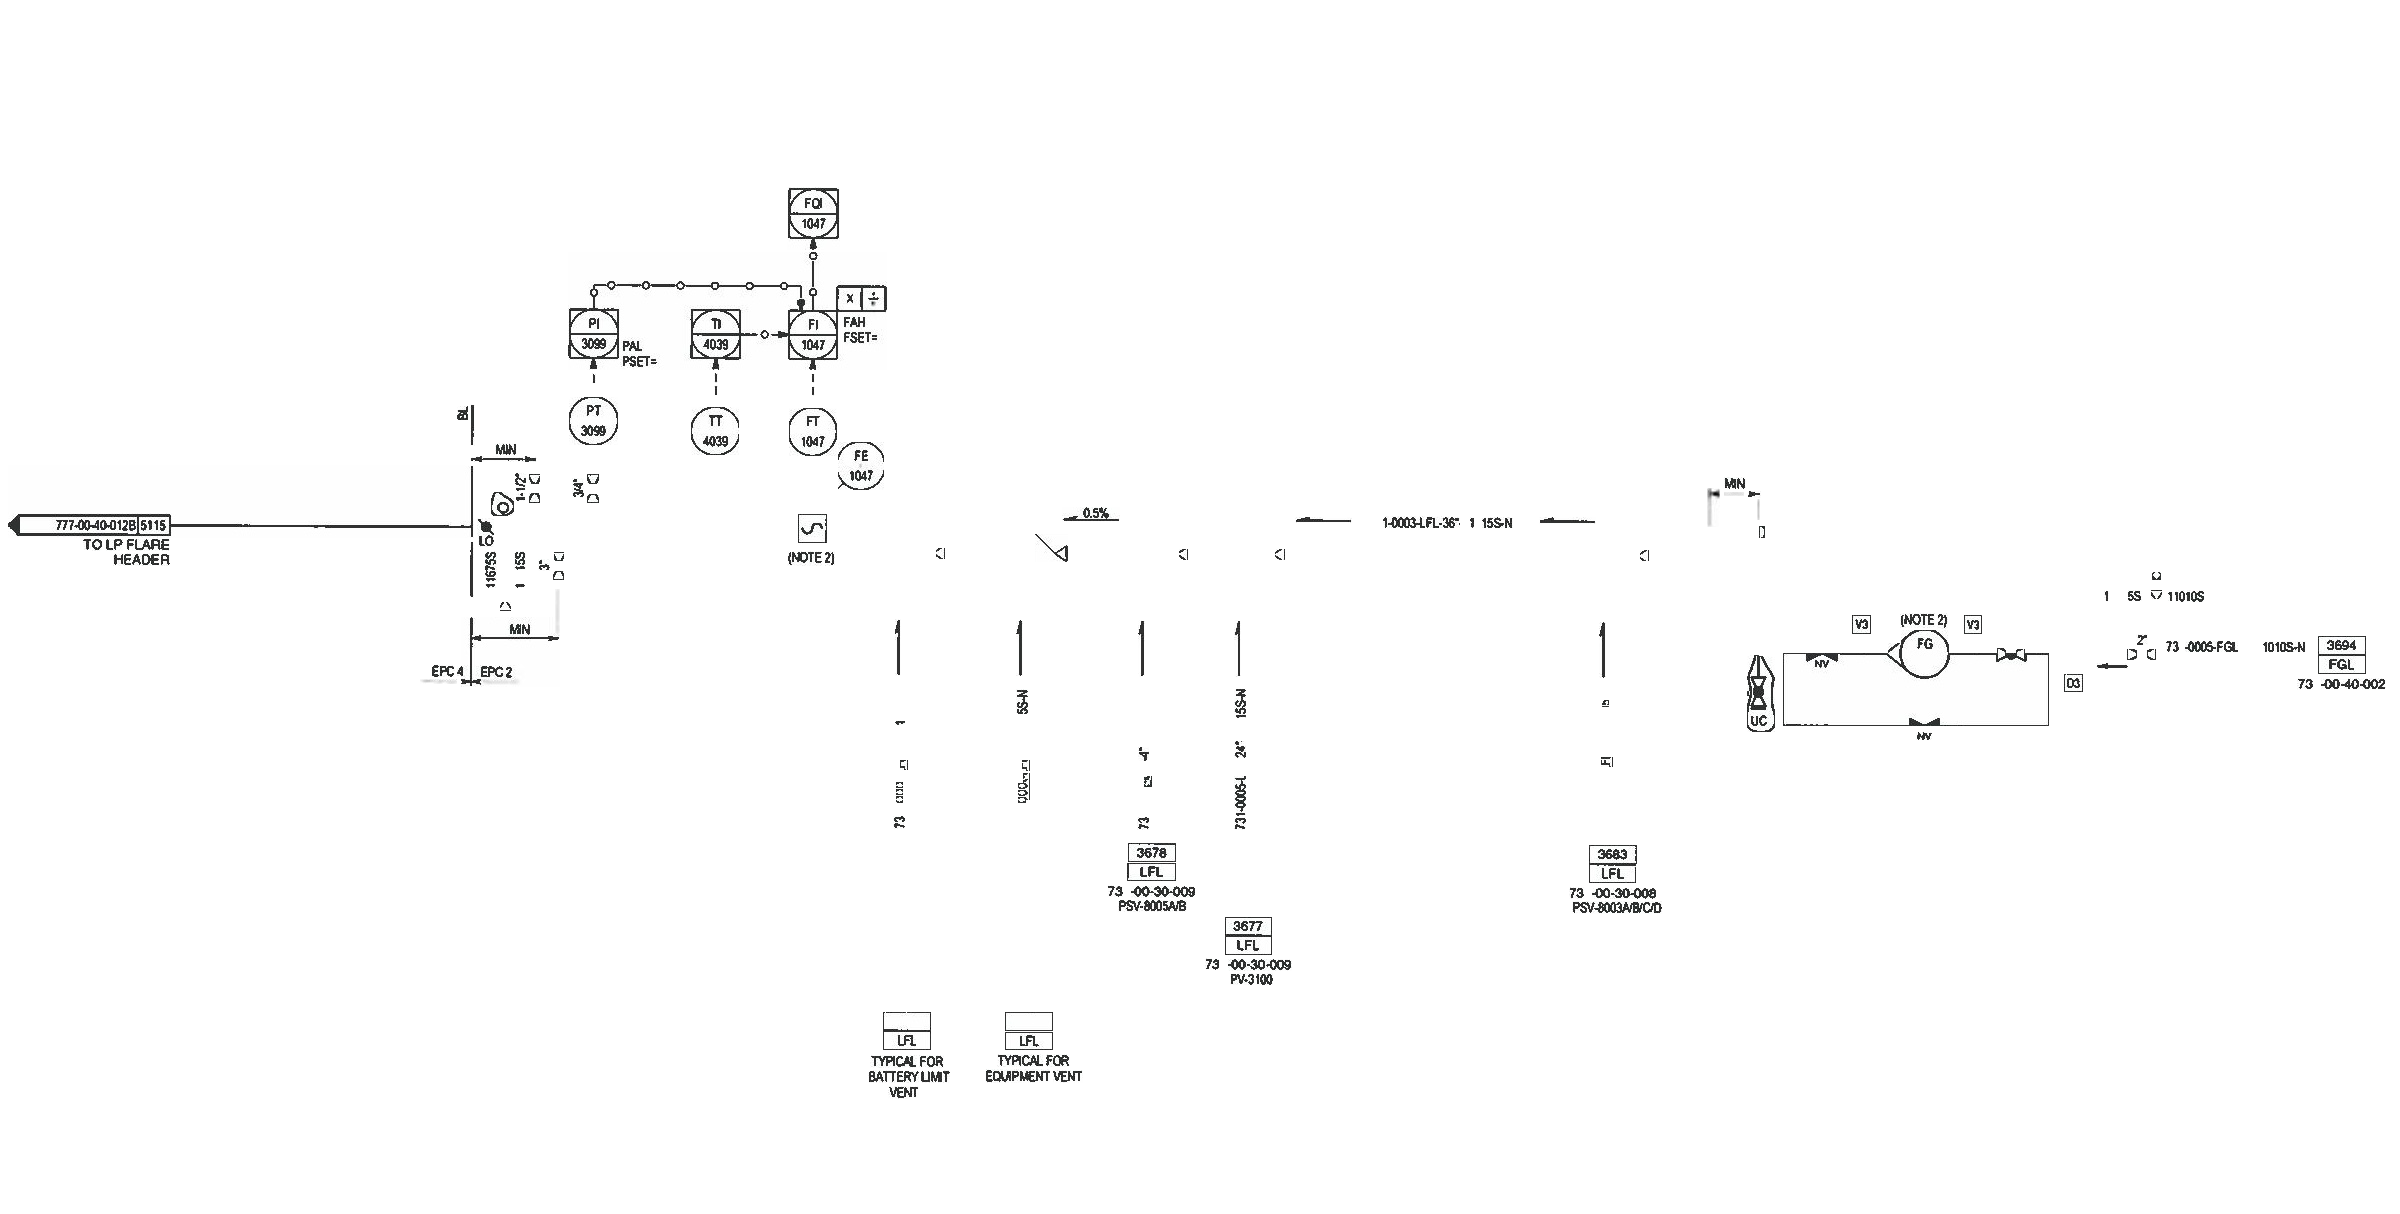


Detected Symbols (coordinates only):
Thick Line: 140 instances
  1. Position: (898, 1088), Size: (7x9)
  2. Position: (888, 1086), Size: (31x13)
  3. Position: (1062, 1072), Size: (7x9)
  4. Position: (1030, 1072), Size: (7x9)
  5. Position: (921, 1071), Size: (21x12)
  6. Position: (897, 1071), Size: (22x12)
  7. Position: (1053, 1070), Size: (30x13)
  8. Position: (943, 1070), Size: (7x13)
  9. Position: (868, 1070), Size: (28x13)
  10. Position: (986, 1069), Size: (64x14)
  11. Position: (926, 1055), Size: (18x13)
  12. Position: (919, 1055), Size: (7x12)
  13. Position: (1046, 1054), Size: (24x13)
  14. Position: (1019, 1035), Size: (20x12)
  15. Position: (897, 1035), Size: (20x11)
  16. Position: (1256, 973), Size: (17x12)
  17. Position: (1230, 973), Size: (24x12)
  18. Position: (1228, 959), Size: (64x12)
  19. Position: (1212, 959), Size: (7x11)
  20. Position: (1249, 921), Size: (14x10)
  21. Position: (1233, 921), Size: (15x10)
  22. Position: (1595, 901), Size: (67x13)
  2

In [ ]:
# Install required libraries (if not already installed)
!pip install opencv-python numpy

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the P&ID image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read and preprocess the image
img = cv2.imread(image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Edge detection for line analysis
edges = cv2.Canny(gray, 50, 150)

# Find contours using RETR_LIST to detect all contours, including nested ones
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Define the background color (assuming white; adjust if needed)
background_color = (255, 255, 255)  # BGR format: (Blue, Green, Red)

# Create an output image filled with the background color
output = np.full_like(img, background_color)

# Get image dimensions and set size constraints
img_height, img_width = img.shape[:2]
max_width = img_width / 2
max_height = img_height / 2

# Function to classify symbols (unchanged from your code)
def classify_symbol(contour, edges):
    x, y, w, h = cv2.boundingRect(contour)
    if w > max_width or h > max_height:
        return None

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    aspect = float(w) / h if h != 0 else 0
    roi = edges[y:y+h, x:x+w]

    # Approximate the shape
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    vertices = len(approx)

    # Circle detection
    circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0
    if vertices >= 6 and circularity > 0.7:
        if area < 200:
            return "Small Circle"
        return "Circle"

    # Triangle detection
    if vertices == 3:
        return "Triangle"

    # Other shapes (e.g., square, rectangle)
    if vertices == 4:
        if 0.95 < aspect < 1.05:
            return "Square"
        return "Rectangle"

    # Line types (optional for P&ID context)
    line_thickness = np.mean(roi) if roi.size > 0 else 0
    if line_thickness > 10:
        if cv2.countNonZero(roi) / (w * h) > 0.3:
            return "Thick Line"
        return "Solid Line"
    elif line_thickness > 2:
        if cv2.countNonZero(roi) / (w * h) < 0.2:
            return "Dashed Line"
        return "Thin Line"

    # P&ID-specific symbols (examples)
    if area > 1000:
        if vertices == 4 and 0.8 < aspect < 1.2:
            return "Tank/Vessel"
        elif vertices > 6 and 0.8 < aspect < 1.2:
            return "Instrument Circle"
    elif area > 200:
        if vertices == 3 and aspect > 1.5:
            return "Arrow"
        elif vertices == 4 and 0.8 < aspect < 1.2:
            return "Cross"

    return "Unknown"

# Detect and bound symbols
symbols = {}
min_area = 20  # Minimum area to detect small symbols

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        x, y, w, h = cv2.boundingRect(contour)
        symbol_type = classify_symbol(contour, edges)

        if symbol_type and w <= max_width and h <= max_height:
            if symbol_type not in symbols:
                symbols[symbol_type] = []
            symbols[symbol_type].append((x, y, w, h))

            # Copy the region from the original image to the output
            output[y:y+h, x:x+w] = img[y:y+h, x:x+w]

# Display the result
cv2_imshow(output)
cv2.imwrite('pid_symbols_only.jpg', output)

# Print detected symbols summary
print("\nDetected Symbols (coordinates only):")
for symbol_type, boxes in symbols.items():
    print(f"{symbol_type}: {len(boxes)} instances")
    for i, (x, y, w, h) in enumerate(boxes, 1):
        print(f"  {i}. Position: ({x}, {y}), Size: ({w}x{h})")

Saving input.png to input (20).png


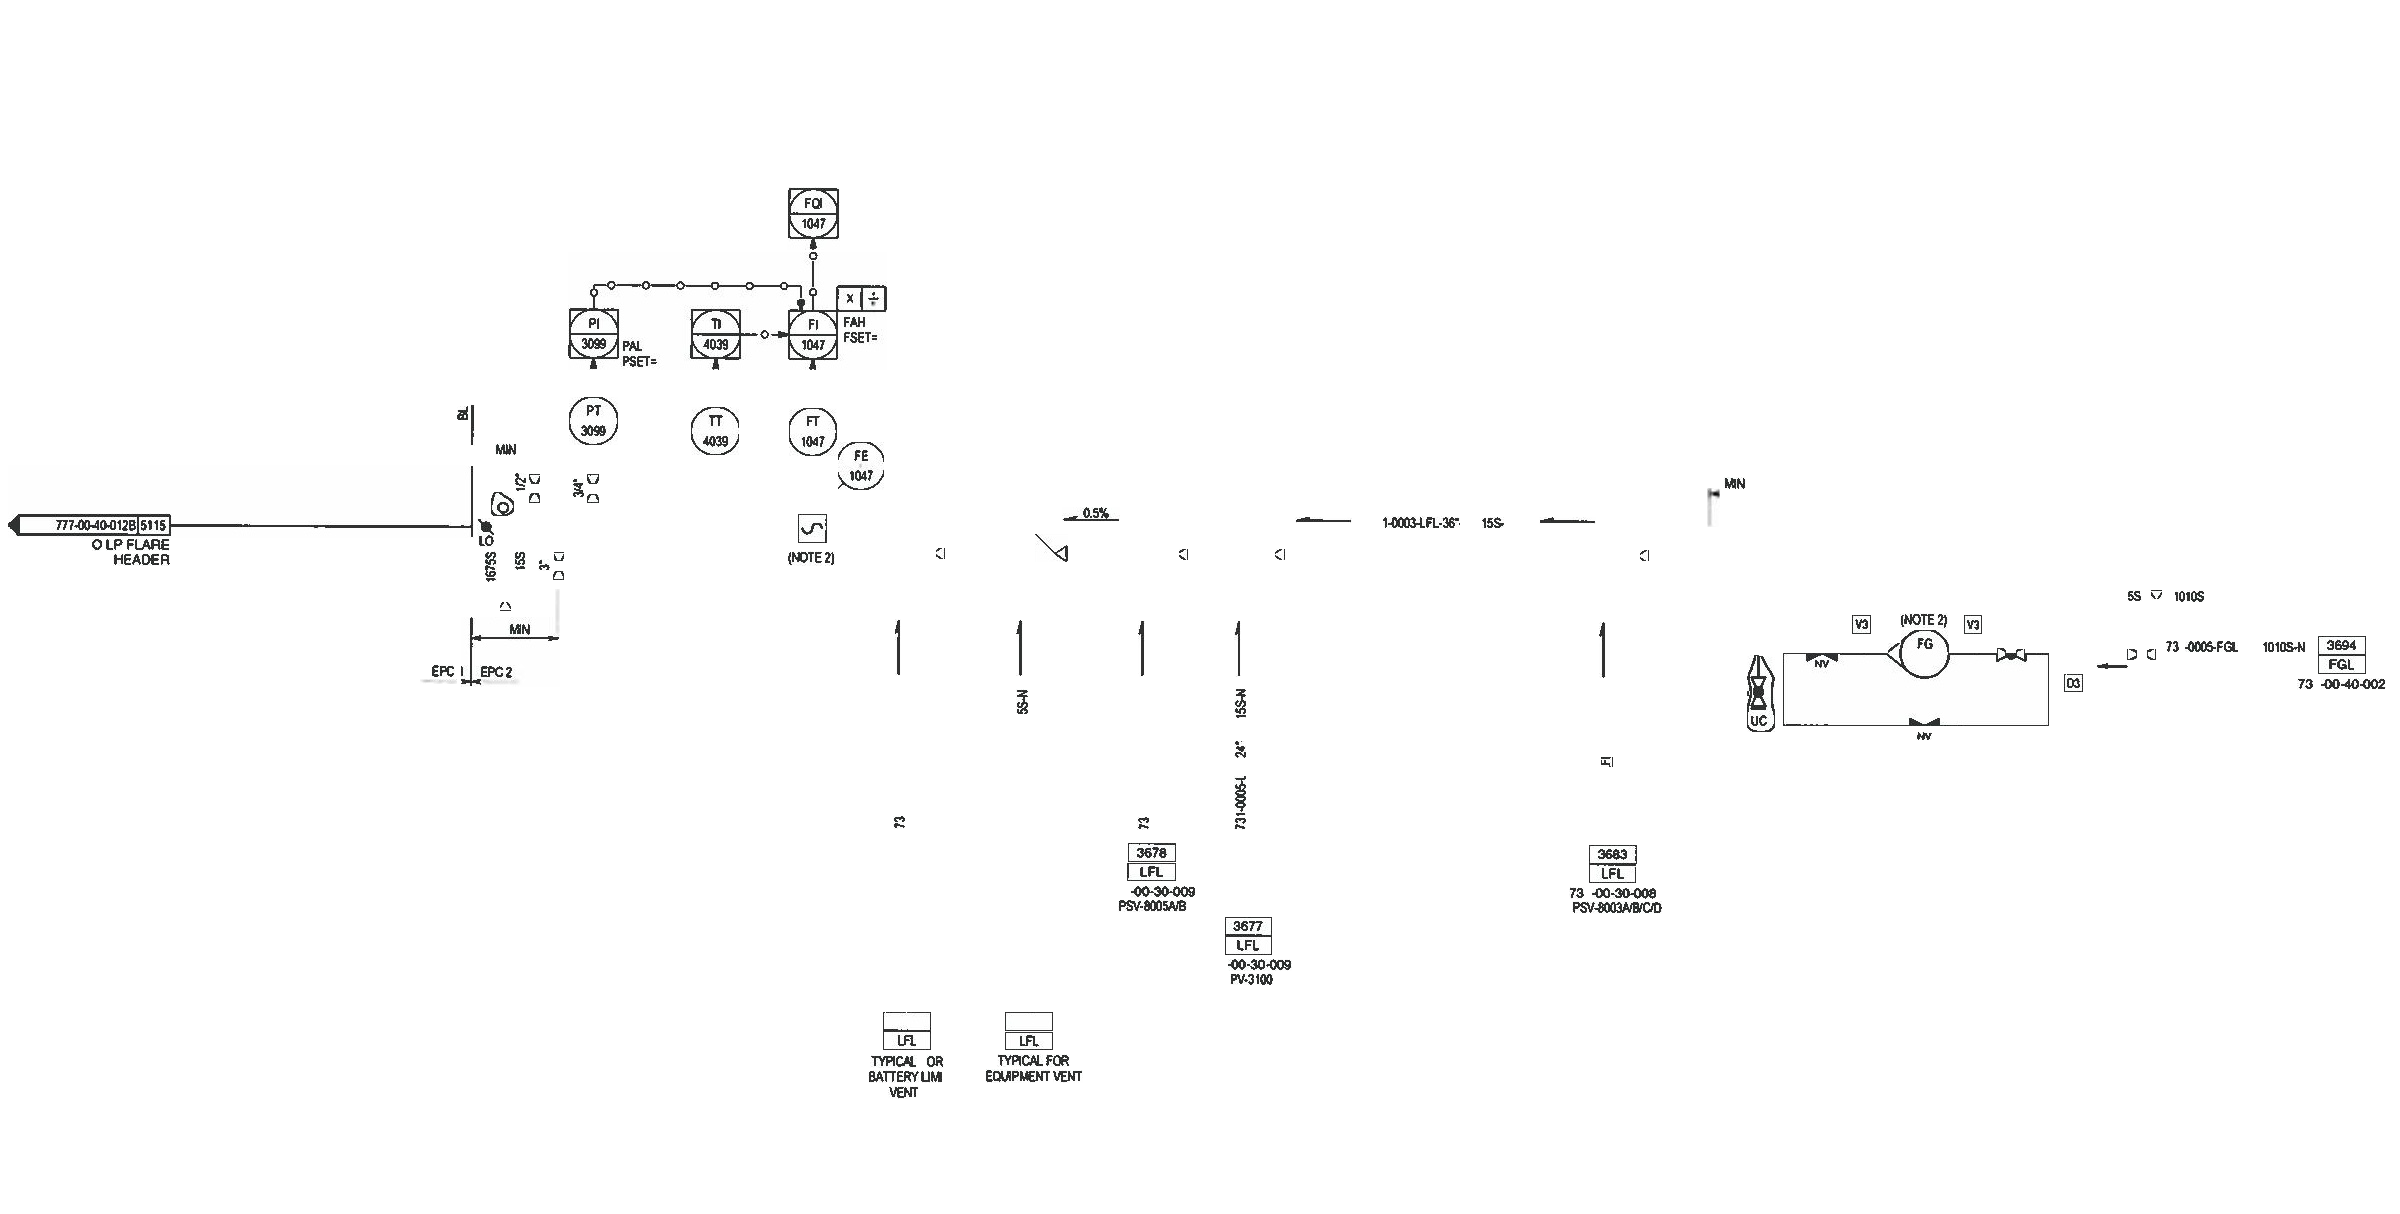


Detected Symbols (coordinates only):
Unknown: 143 instances
  1. Position: (888, 1086), Size: (31x13)
  2. Position: (921, 1071), Size: (21x12)
  3. Position: (897, 1071), Size: (22x12)
  4. Position: (1053, 1070), Size: (30x13)
  5. Position: (868, 1070), Size: (28x13)
  6. Position: (986, 1069), Size: (64x14)
  7. Position: (926, 1055), Size: (18x13)
  8. Position: (870, 1055), Size: (47x13)
  9. Position: (1046, 1054), Size: (24x13)
  10. Position: (997, 1054), Size: (46x13)
  11. Position: (1019, 1035), Size: (20x12)
  12. Position: (897, 1035), Size: (20x11)
  13. Position: (1256, 973), Size: (17x12)
  14. Position: (1230, 973), Size: (24x12)
  15. Position: (1228, 959), Size: (64x12)
  16. Position: (1236, 940), Size: (24x11)
  17. Position: (1233, 921), Size: (15x10)
  18. Position: (1595, 901), Size: (67x13)
  19. Position: (1572, 901), Size: (23x13)
  20. Position: (1177, 900), Size: (10x12)
  21. Position: (1118, 900), Size: (60x12)
  22. Position: (1592, 888), Size: (64x11)

In [ ]:
# Install required libraries (if not already installed)
!pip install opencv-python numpy

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the P&ID image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read and preprocess the image
img = cv2.imread(image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Edge detection for line analysis
edges = cv2.Canny(gray, 50, 150)

# Find contours using RETR_LIST to detect all contours, including nested ones
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Define the background color (white; adjust if needed)
background_color = (255, 255, 255)  # BGR format: (Blue, Green, Red)

# Create an output image filled with the background color
output = np.full_like(img, background_color)

# Get image dimensions and set size constraints
img_height, img_width = img.shape[:2]
max_width = img_width / 2
max_height = img_height / 2

# Function to classify symbols with line filtering
def classify_symbol(contour, edges):
    x, y, w, h = cv2.boundingRect(contour)
    if w > max_width or h > max_height:
        return None

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    aspect = float(w) / h if h != 0 else 0
    roi = edges[y:y+h, x:x+w]

    # Approximate the shape
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    vertices = len(approx)

    # Filter out line-like contours based on aspect ratio
    if aspect > 10 or aspect < 0.1:  # Extreme aspect ratios indicate lines
        return None

    # Circle detection
    circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0
    if vertices >= 6 and circularity > 0.7:
        if area < 200:
            return "Small Circle"
        return "Circle"

    # Triangle detection
    if vertices == 3:
        return "Triangle"

    # Other shapes (e.g., square, rectangle)
    if vertices == 4:
        if 0.95 < aspect < 1.05:
            return "Square"
        return "Rectangle"

    # P&ID-specific symbols (examples)
    if area > 1000:
        if vertices == 4 and 0.8 < aspect < 1.2:
            return "Tank/Vessel"
        elif vertices > 6 and 0.8 < aspect < 1.2:
            return "Instrument Circle"
    elif area > 200:
        if vertices == 3 and aspect > 1.5:
            return "Arrow"
        elif vertices == 4 and 0.8 < aspect < 1.2:
            return "Cross"

    return "Unknown"

# Detect and bound symbols
symbols = {}
min_area = 50  # Increased to avoid small noise; adjust as needed

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        x, y, w, h = cv2.boundingRect(contour)
        symbol_type = classify_symbol(contour, edges)

        if symbol_type and w <= max_width and h <= max_height:
            if symbol_type not in symbols:
                symbols[symbol_type] = []
            symbols[symbol_type].append((x, y, w, h))

            # Copy the region from the original image to the output
            output[y:y+h, x:x+w] = img[y:y+h, x:x+w]

# Display the result
cv2_imshow(output)
cv2.imwrite('pid_symbols_only.jpg', output)

# Print detected symbols summary
print("\nDetected Symbols (coordinates only):")
for symbol_type, boxes in symbols.items():
    print(f"{symbol_type}: {len(boxes)} instances")
    for i, (x, y, w, h) in enumerate(boxes, 1):
        print(f"  {i}. Position: ({x}, {y}), Size: ({w}x{h})")

Saving input.png to input (21).png


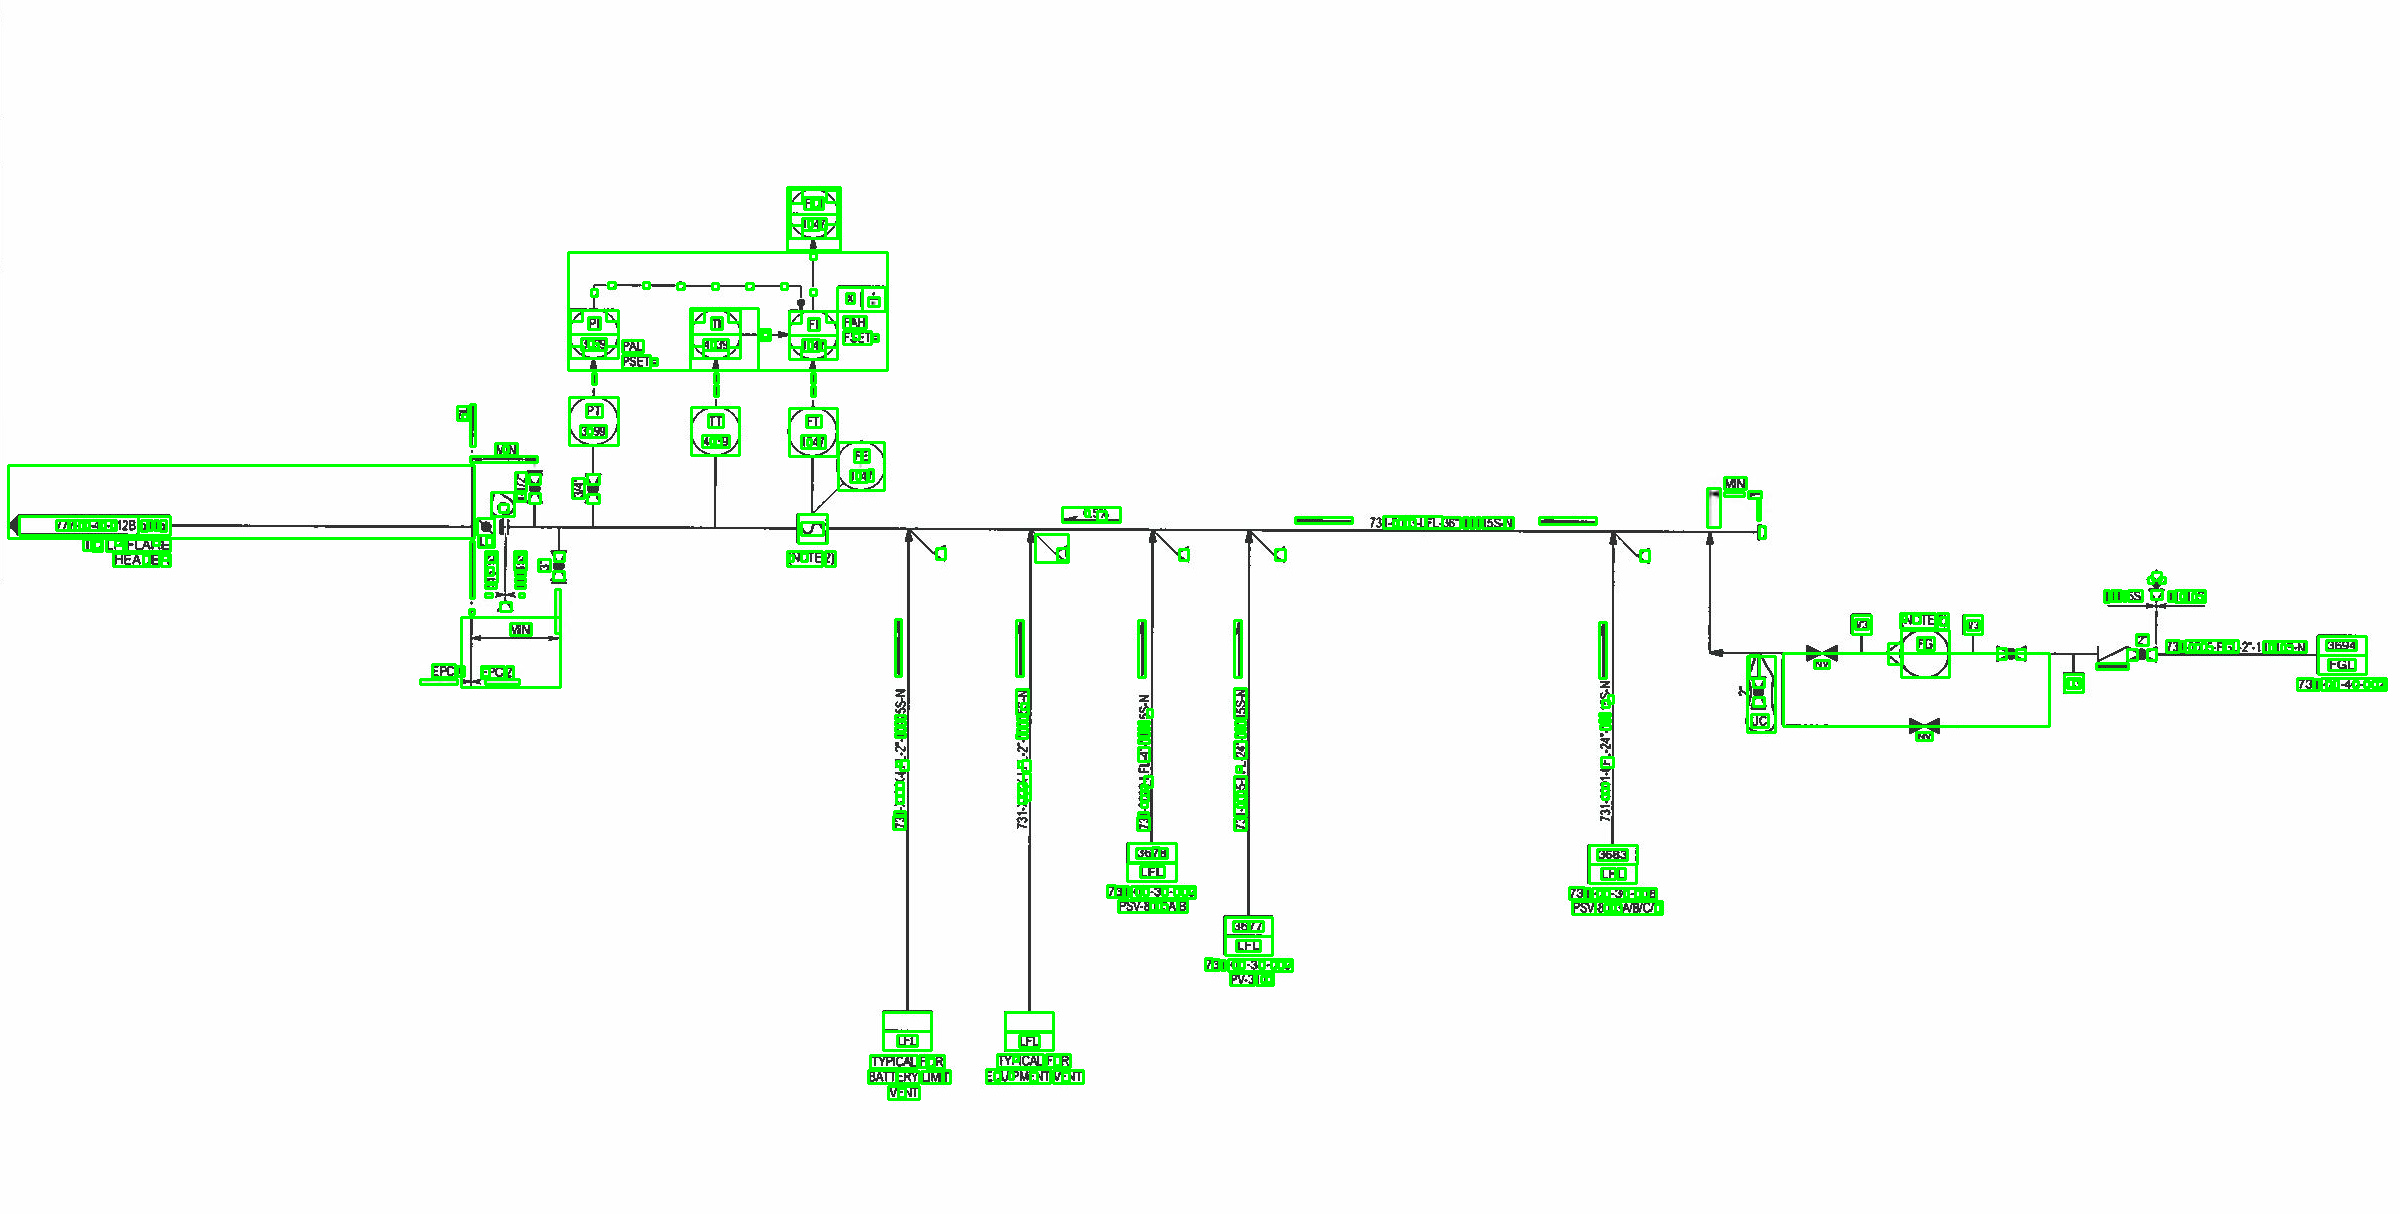


Detected Symbols (coordinates only):
Thick Line: 171 instances
  1. Position: (898, 1088), Size: (7x9)
  2. Position: (888, 1086), Size: (31x13)
  3. Position: (1062, 1072), Size: (7x9)
  4. Position: (1030, 1072), Size: (7x9)
  5. Position: (921, 1071), Size: (21x12)
  6. Position: (897, 1071), Size: (22x12)
  7. Position: (1053, 1070), Size: (30x13)
  8. Position: (943, 1070), Size: (7x13)
  9. Position: (868, 1070), Size: (28x13)
  10. Position: (986, 1069), Size: (64x14)
  11. Position: (926, 1055), Size: (18x13)
  12. Position: (919, 1055), Size: (7x12)
  13. Position: (1046, 1054), Size: (24x13)
  14. Position: (1019, 1035), Size: (20x12)
  15. Position: (897, 1035), Size: (20x11)
  16. Position: (1256, 973), Size: (17x12)
  17. Position: (1230, 973), Size: (24x12)
  18. Position: (1221, 960), Size: (4x10)
  19. Position: (1228, 959), Size: (64x12)
  20. Position: (1212, 959), Size: (7x11)
  21. Position: (1249, 921), Size: (14x10)
  22. Position: (1233, 921), Size: (15x10)
  23

In [ ]:
# Install required libraries (if not already installed)
!pip install opencv-python numpy

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the P&ID image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read and preprocess the image
img = cv2.imread(image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Edge detection for line analysis
edges = cv2.Canny(gray, 50, 150)

# Find contours using RETR_LIST to detect all contours, including nested ones
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

# Get image dimensions and set size constraints
img_height, img_width = img.shape[:2]
max_width = img_width / 2
max_height = img_height / 2

# Function to classify symbols with adaptive epsilon
def classify_symbol(contour, edges):
    x, y, w, h = cv2.boundingRect(contour)
    if w > max_width or h > max_height:
        return None

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    aspect = float(w) / h if h != 0 else 0
    roi = edges[y:y+h, x:x+w]

    # Adaptive epsilon: smaller for smaller perimeters
    epsilon = 0.01 * perimeter if perimeter > 100 else 0.02 * perimeter
    approx = cv2.approxPolyDP(contour, epsilon, True)
    vertices = len(approx)

    # Circle detection
    circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0
    if vertices >= 6 and circularity > 0.7:
        if area < 200:
            return "Small Circle"
        return "Circle"

    # Triangle detection
    if vertices == 3:
        return "Triangle"

    # Other shapes (e.g., square, rectangle)
    if vertices == 4:
        if 0.95 < aspect < 1.05:
            return "Square"
        return "Rectangle"

    # Line types (optional for P&ID context)
    line_thickness = np.mean(roi) if roi.size > 0 else 0
    if line_thickness > 10:
        if cv2.countNonZero(roi) / (w * h) > 0.3:
            return "Thick Line"
        return "Solid Line"
    elif line_thickness > 2:
        if cv2.countNonZero(roi) / (w * h) < 0.2:
            return "Dashed Line"
        return "Thin Line"

    # P&ID-specific symbols (examples)
    if area > 1000:
        if vertices == 4 and 0.8 < aspect < 1.2:
            return "Tank/Vessel"
        elif vertices > 6 and 0.8 < aspect < 1.2:
            return "Instrument Circle"
    elif area > 200:
        if vertices == 3 and aspect > 1.5:
            return "Arrow"
        elif vertices == 4 and 0.8 < aspect < 1.2:
            return "Cross"

    return "Unknown"

# Detect and bound symbols
symbols = {}
min_area = 10  # Lowered to detect smaller triangles

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        x, y, w, h = cv2.boundingRect(contour)
        symbol_type = classify_symbol(contour, edges)

        if symbol_type and w <= max_width and h <= max_height:
            if symbol_type not in symbols:
                symbols[symbol_type] = []
            symbols[symbol_type].append((x, y, w, h))

            # Draw green bounding box
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2_imshow(output)
cv2.imwrite('pid_symbols_bounding_only.jpg', output)

# Print detected symbols summary
print("\nDetected Symbols (coordinates only):")
for symbol_type, boxes in symbols.items():
    print(f"{symbol_type}: {len(boxes)} instances")
    for i, (x, y, w, h) in enumerate(boxes, 1):
        print(f"  {i}. Position: ({x}, {y}), Size: ({w}x{h})")

Saving input.png to input (22).png


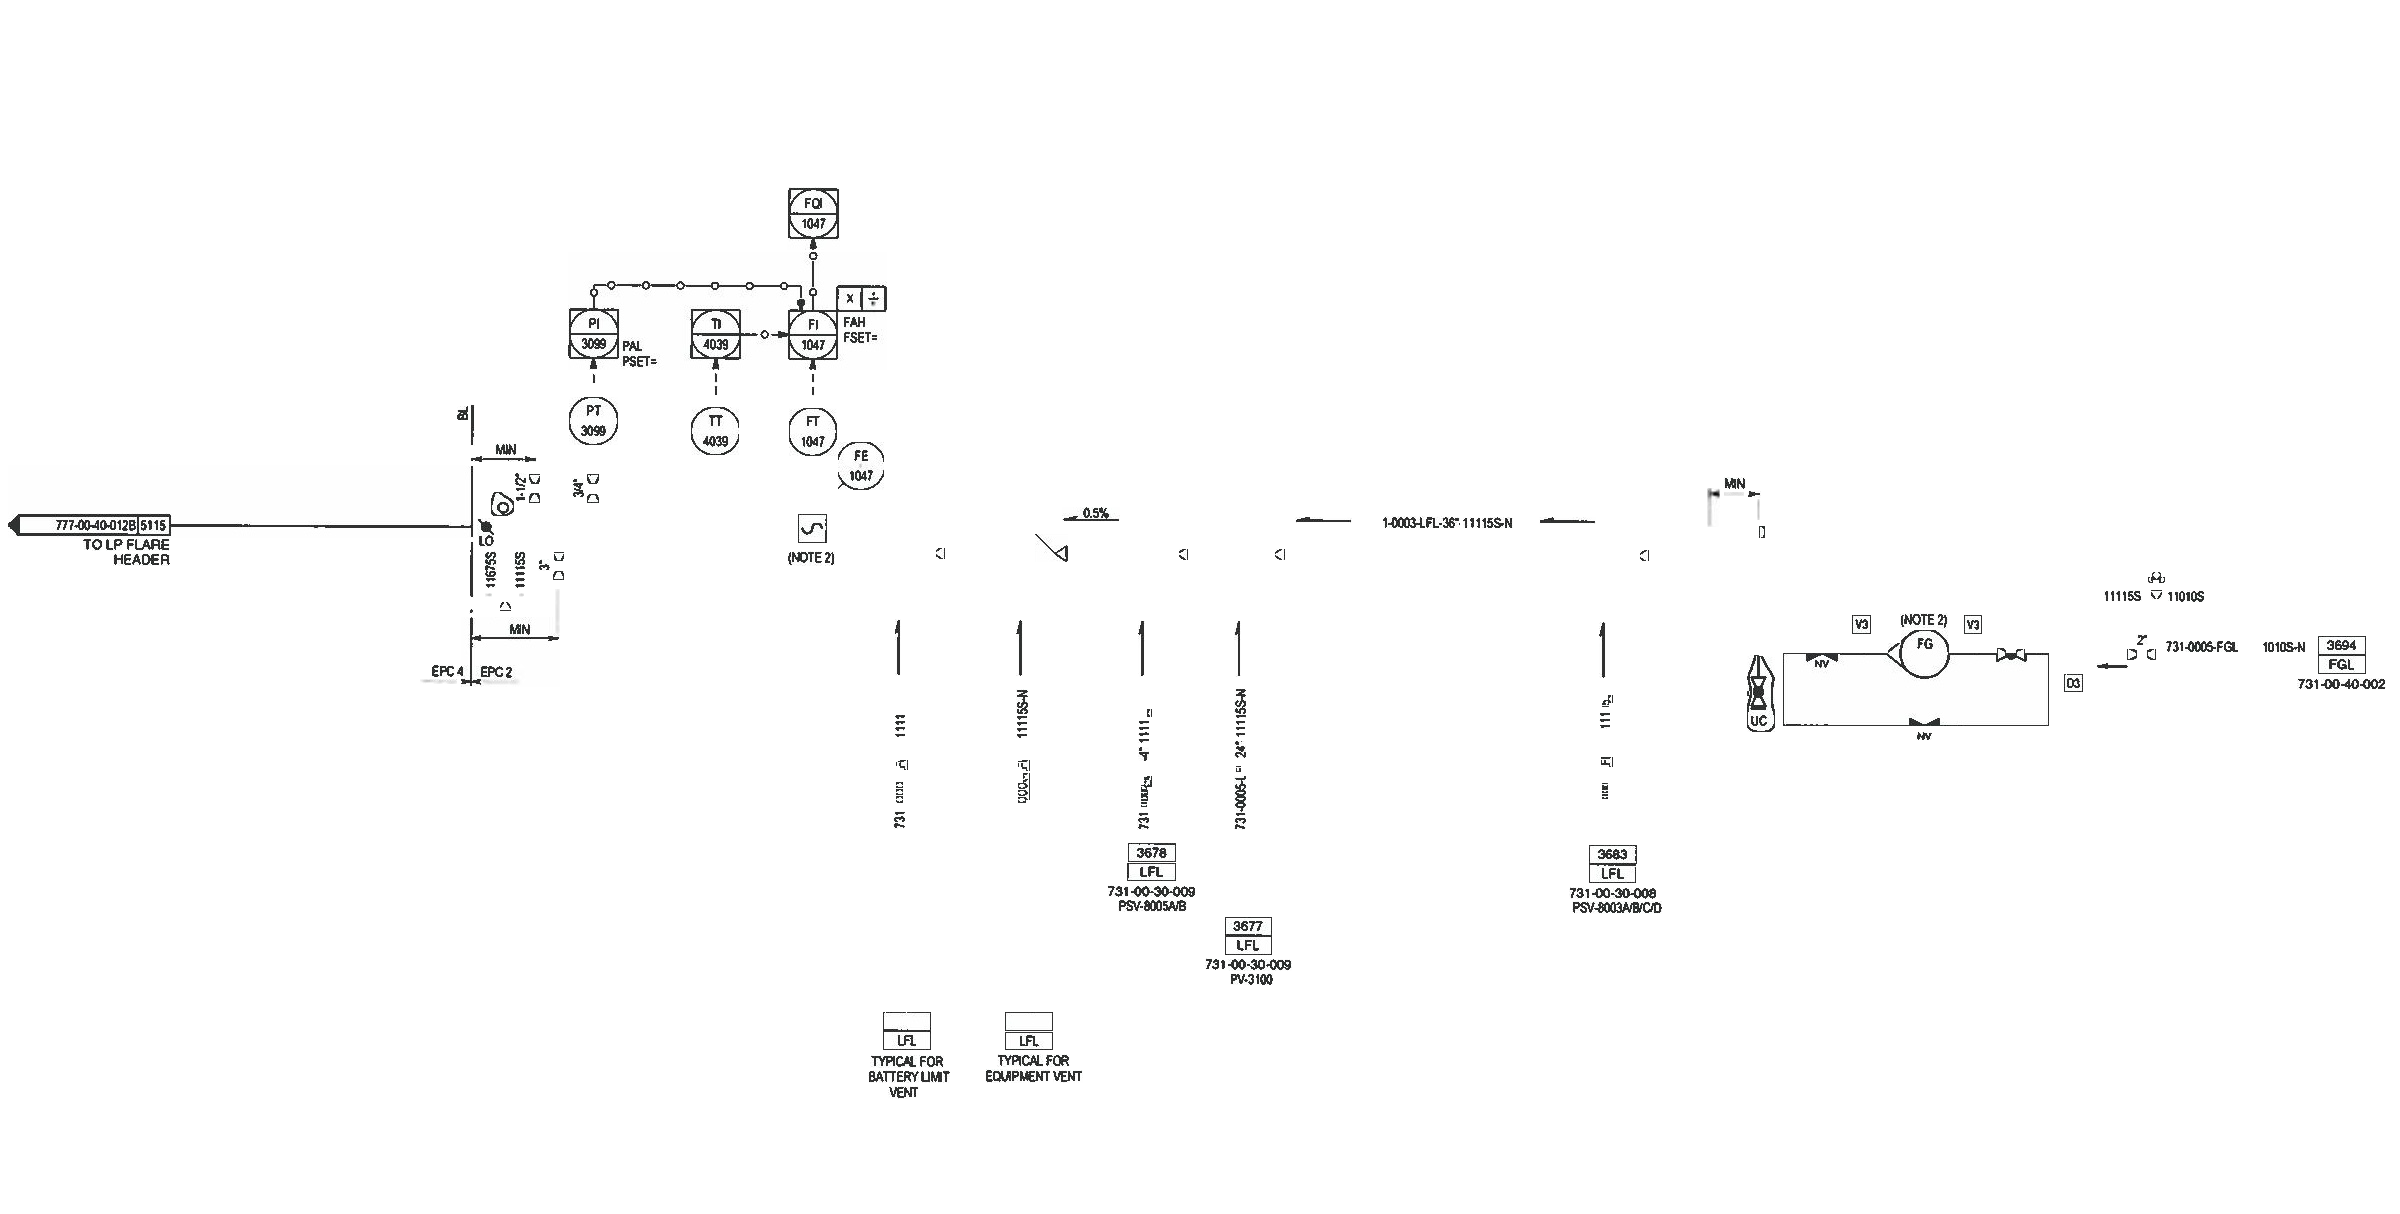


Detected Symbols (coordinates only):
Thick Line: 171 instances
  1. Position: (898, 1088), Size: (7x9)
  2. Position: (888, 1086), Size: (31x13)
  3. Position: (1062, 1072), Size: (7x9)
  4. Position: (1030, 1072), Size: (7x9)
  5. Position: (921, 1071), Size: (21x12)
  6. Position: (897, 1071), Size: (22x12)
  7. Position: (1053, 1070), Size: (30x13)
  8. Position: (943, 1070), Size: (7x13)
  9. Position: (868, 1070), Size: (28x13)
  10. Position: (986, 1069), Size: (64x14)
  11. Position: (926, 1055), Size: (18x13)
  12. Position: (919, 1055), Size: (7x12)
  13. Position: (1046, 1054), Size: (24x13)
  14. Position: (1019, 1035), Size: (20x12)
  15. Position: (897, 1035), Size: (20x11)
  16. Position: (1256, 973), Size: (17x12)
  17. Position: (1230, 973), Size: (24x12)
  18. Position: (1221, 960), Size: (4x10)
  19. Position: (1228, 959), Size: (64x12)
  20. Position: (1212, 959), Size: (7x11)
  21. Position: (1249, 921), Size: (14x10)
  22. Position: (1233, 921), Size: (15x10)
  23

In [ ]:
# Install required libraries (if not already installed)
!pip install opencv-python numpy

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the P&ID image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read and preprocess the image
img = cv2.imread(image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Edge detection for line analysis
edges = cv2.Canny(gray, 50, 150)

# Find contours using RETR_LIST to detect all contours, including nested ones
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Define the background color (assuming white; adjust if needed)
background_color = (255, 255, 255)  # BGR format: White (common in P&ID)

# Create an output image filled with the background color
output = np.full_like(img, background_color)

# Get image dimensions and set size constraints
img_height, img_width = img.shape[:2]
max_width = img_width / 2
max_height = img_height / 2

# Function to classify symbols with adaptive epsilon
def classify_symbol(contour, edges):
    x, y, w, h = cv2.boundingRect(contour)
    if w > max_width or h > max_height:
        return None

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    aspect = float(w) / h if h != 0 else 0
    roi = edges[y:y+h, x:x+w]

    # Adaptive epsilon: smaller for smaller perimeters
    epsilon = 0.01 * perimeter if perimeter > 100 else 0.02 * perimeter
    approx = cv2.approxPolyDP(contour, epsilon, True)
    vertices = len(approx)

    # Circle detection
    circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0
    if vertices >= 6 and circularity > 0.7:
        if area < 200:
            return "Small Circle"
        return "Circle"

    # Triangle detection
    if vertices == 3:
        return "Triangle"

    # Other shapes (e.g., square, rectangle)
    if vertices == 4:
        if 0.95 < aspect < 1.05:
            return "Square"
        return "Rectangle"

    # Line types (optional for P&ID context)
    line_thickness = np.mean(roi) if roi.size > 0 else 0
    if line_thickness > 10:
        if cv2.countNonZero(roi) / (w * h) > 0.3:
            return "Thick Line"
        return "Solid Line"
    elif line_thickness > 2:
        if cv2.countNonZero(roi) / (w * h) < 0.2:
            return "Dashed Line"
        return "Thin Line"

    # P&ID-specific symbols (examples)
    if area > 1000:
        if vertices == 4 and 0.8 < aspect < 1.2:
            return "Tank/Vessel"
        elif vertices > 6 and 0.8 < aspect < 1.2:
            return "Instrument Circle"
    elif area > 200:
        if vertices == 3 and aspect > 1.5:
            return "Arrow"
        elif vertices == 4 and 0.8 < aspect < 1.2:
            return "Cross"

    return "Unknown"

# Detect and bound symbols
symbols = {}
min_area = 10  # Minimum area to detect small symbols (including triangles)

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        x, y, w, h = cv2.boundingRect(contour)
        symbol_type = classify_symbol(contour, edges)

        if symbol_type and w <= max_width and h <= max_height:
            if symbol_type not in symbols:
                symbols[symbol_type] = []
            symbols[symbol_type].append((x, y, w, h))

            # Copy the symbol region from the original image to the output
            output[y:y+h, x:x+w] = img[y:y+h, x:x+w]

# Display the result
cv2_imshow(output)
cv2.imwrite('pid_symbols_only.jpg', output)

# Print detected symbols summary
print("\nDetected Symbols (coordinates only):")
for symbol_type, boxes in symbols.items():
    print(f"{symbol_type}: {len(boxes)} instances")
    for i, (x, y, w, h) in enumerate(boxes, 1):
        print(f"  {i}. Position: ({x}, {y}), Size: ({w}x{h})")

TESING

Saving input.png to input (26).png


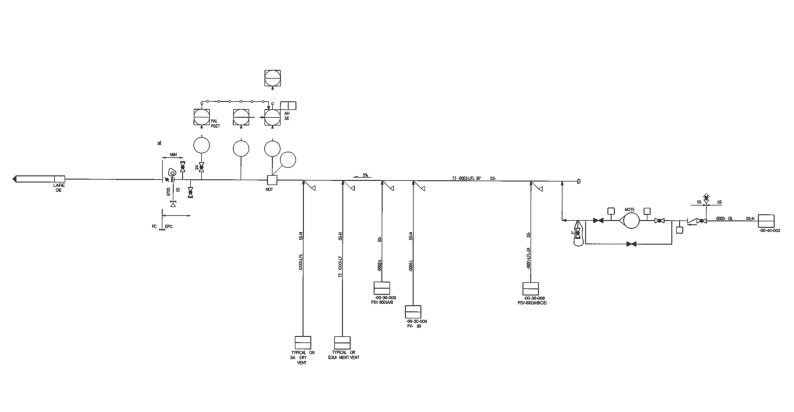

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()
filename = next(iter(uploaded))
image = cv2.imread(filename)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
# Assuming symbols are dark on a light background; adjust if necessary
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours with hierarchy
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create an output image (binary, same size as input)
output = np.zeros_like(binary)

# Define thresholds for symbol detection
compactness_threshold = 0.2  # Adjust based on your image
min_area = 100  # Minimum area to filter out noise

# Process each top-level contour
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:  # Top-level contour (no parent)
        # Collect all contours in the hierarchy (symbol parts)
        hierarchy_contours = [contours[i]]
        child = hierarchy[0][i][2]  # First child
        while child != -1:
            hierarchy_contours.append(contours[child])
            child = hierarchy[0][child][0]  # Next sibling

        # Combine all points in the hierarchy
        all_points = np.vstack([c for c in hierarchy_contours])

        # Compute convex hull to encompass the entire symbol
        hull = cv2.convexHull(all_points)

        # Calculate area and perimeter of the convex hull
        area = cv2.contourArea(hull)
        perimeter = cv2.arcLength(hull, True)

        # Compute compactness to distinguish symbols from lines
        if perimeter > 0:
            compactness = (4 * np.pi * area) / (perimeter ** 2)
            if compactness > compactness_threshold and area > min_area:
                # This is a symbol; draw all contours in the hierarchy
                cv2.drawContours(output, hierarchy_contours, -1, 255, -1)

# Create the final image with the same background
# If original is colored, use it; otherwise, use binary output
if len(image.shape) == 3:  # Color image
    # Create a mask from the output
    mask = output.astype(bool)
    final_image = image.copy()
    # Set non-symbol areas to background (assuming white background; adjust if needed)
    final_image[~mask] = [255, 255, 255]  # White background
else:  # Grayscale or binary input
    final_image = output

# Display the result
plt.figure(figsize=(10, 10))
if len(image.shape) == 3:
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
else:
    plt.imshow(final_image, cmap='gray')
plt.axis('off')
plt.show()

# Optional: Save the output
cv2.imwrite('output_image.png', final_image)
files.download('output_image.png')